In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = "/content/gdrive/MyDrive/application_data.csv"
loan_data = pd.read_csv(data_path)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(loan_data.head(5))

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
from google.colab import files
column_description = files.upload()

Saving columns_description.csv.csv to columns_description.csv (3).csv


In [ ]:
columns_description = pd.read_csv('columns_description.csv.csv', skiprows = 1)
display("columns_description")
columns_description=columns_description.drop(['1'],axis=1)
display(columns_description)

'columns_description'

application_data                    SK_ID_CURR  \
0            application_data                        TARGET   
1            application_data            NAME_CONTRACT_TYPE   
2            application_data                   CODE_GENDER   
3            application_data                  FLAG_OWN_CAR   
4            application_data               FLAG_OWN_REALTY   
5            application_data                  CNT_CHILDREN   
6            application_data              AMT_INCOME_TOTAL   
7            application_data                    AMT_CREDIT   
8            application_data                   AMT_ANNUITY   
9            application_data               AMT_GOODS_PRICE   
10           application_data               NAME_TYPE_SUITE   
11           application_data              NAME_INCOME_TYPE   
12           application_data           NAME_EDUCATION_TYPE   
13           application_data            NAME_FAMILY_STATUS   
14           application_data             NAME_HOUSING_TYPE   
15           application_data    REGION_POPULATION_RELATIVE   
16           application_data                    DAYS_BIRTH   
17           application_data                 DAYS_EMPLOYED   
18           application_data             DAYS_REGISTRATION   
19           application_data               DAYS_ID_PUBLISH   
20           application_data                   OWN_CAR_AGE   
21           application_data                    FLAG_MOBIL   
22           application_data                FLAG_EMP_PHONE   
23           application_data               FLAG_WORK_PHONE   
24           application_data              FLAG_CONT_MOBILE   
25           application_data                    FLAG_PHONE   
26           application_data                    FLAG_EMAIL   
27           application_data               OCCUPATION_TYPE   
28           application_data               CNT_FAM_MEMBERS   
29           application_data          REGION_RATING_CLIENT   
30           application_data   REGION_RATING_CLIENT_W_CITY   
31           application_data    WEEKDAY_APPR_PROCESS_START   
32           application_data       HOUR_APPR_PROCESS_START   
33           application_data    REG_REGION_NOT_LIVE_REGION   
34           application_data    REG_REGION_NOT_WORK_REGION   
35           application_data   LIVE_REGION_NOT_WORK_REGION   
36           application_data        REG_CITY_NOT_LIVE_CITY   
37           application_data        REG_CITY_NOT_WORK_CITY   
38           application_data       LIVE_CITY_NOT_WORK_CITY   
39           application_data             ORGANIZATION_TYPE   
40           application_data                  EXT_SOURCE_1   
41           application_data                  EXT_SOURCE_2   
42           application_data                  EXT_SOURCE_3   
43           application_data                APARTMENTS_AVG   
44           application_data              BASEMENTAREA_AVG   
45           application_data   YEARS_BEGINEXPLUATATION_AVG   
46           application_data               YEARS_BUILD_AVG   
47           application_data                COMMONAREA_AVG   
48           application_data                 ELEVATORS_AVG   
49           application_data                 ENTRANCES_AVG   
50           application_data                 FLOORSMAX_AVG   
51           application_data                 FLOORSMIN_AVG   
52           application_data                  LANDAREA_AVG   
53           application_data          LIVINGAPARTMENTS_AVG   
54           application_data                LIVINGAREA_AVG   
55           application_data       NONLIVINGAPARTMENTS_AVG   
56           application_data             NONLIVINGAREA_AVG   
57           application_data               APARTMENTS_MODE   
58           application_data             BASEMENTAREA_MODE   
59           application_data  YEARS_BEGINEXPLUATATION_MODE   
60           application_data              YEARS_BUILD_MODE   
61           application_data               COMMONAREA_MODE   
62           application_data               

In [ ]:
columns_description['ID of loan in our sample']

0      Target variable (1 - client with payment diffi...
1            Identification if loan is cash or revolving
2                                   Gender of the client
3                          Flag if the client owns a car
4                    Flag if client owns a house or flat
5                      Number of children the client has
6                                   Income of the client
7                              Credit amount of the loan
8                                           Loan annuity
9      For consumer loans it is the price of the good...
10     Who was accompanying client when he was applyi...
11     Clients income type (businessman, working, mat...
12        Level of highest education the client achieved
13                           Family status of the client
14     What is the housing situation of the client (r...
15     Normalized population of region where client l...
16       Client's age in days at the time of application
17     How many days before the

In [ ]:
#checking duplicate data like labels or features or client id/number
print(loan_data['SK_ID_CURR'].is_unique)
print(loan_data.columns.is_unique)

True
True


In [ ]:
#checking any missing data and dropping non-significant features
loan_data.drop(['SK_ID_CURR'] , axis =1 , inplace = True)
pd.isna(loan_data).any()

TARGET                          False
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                  True
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                      True
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE                      False
FLAG_EMAIL  

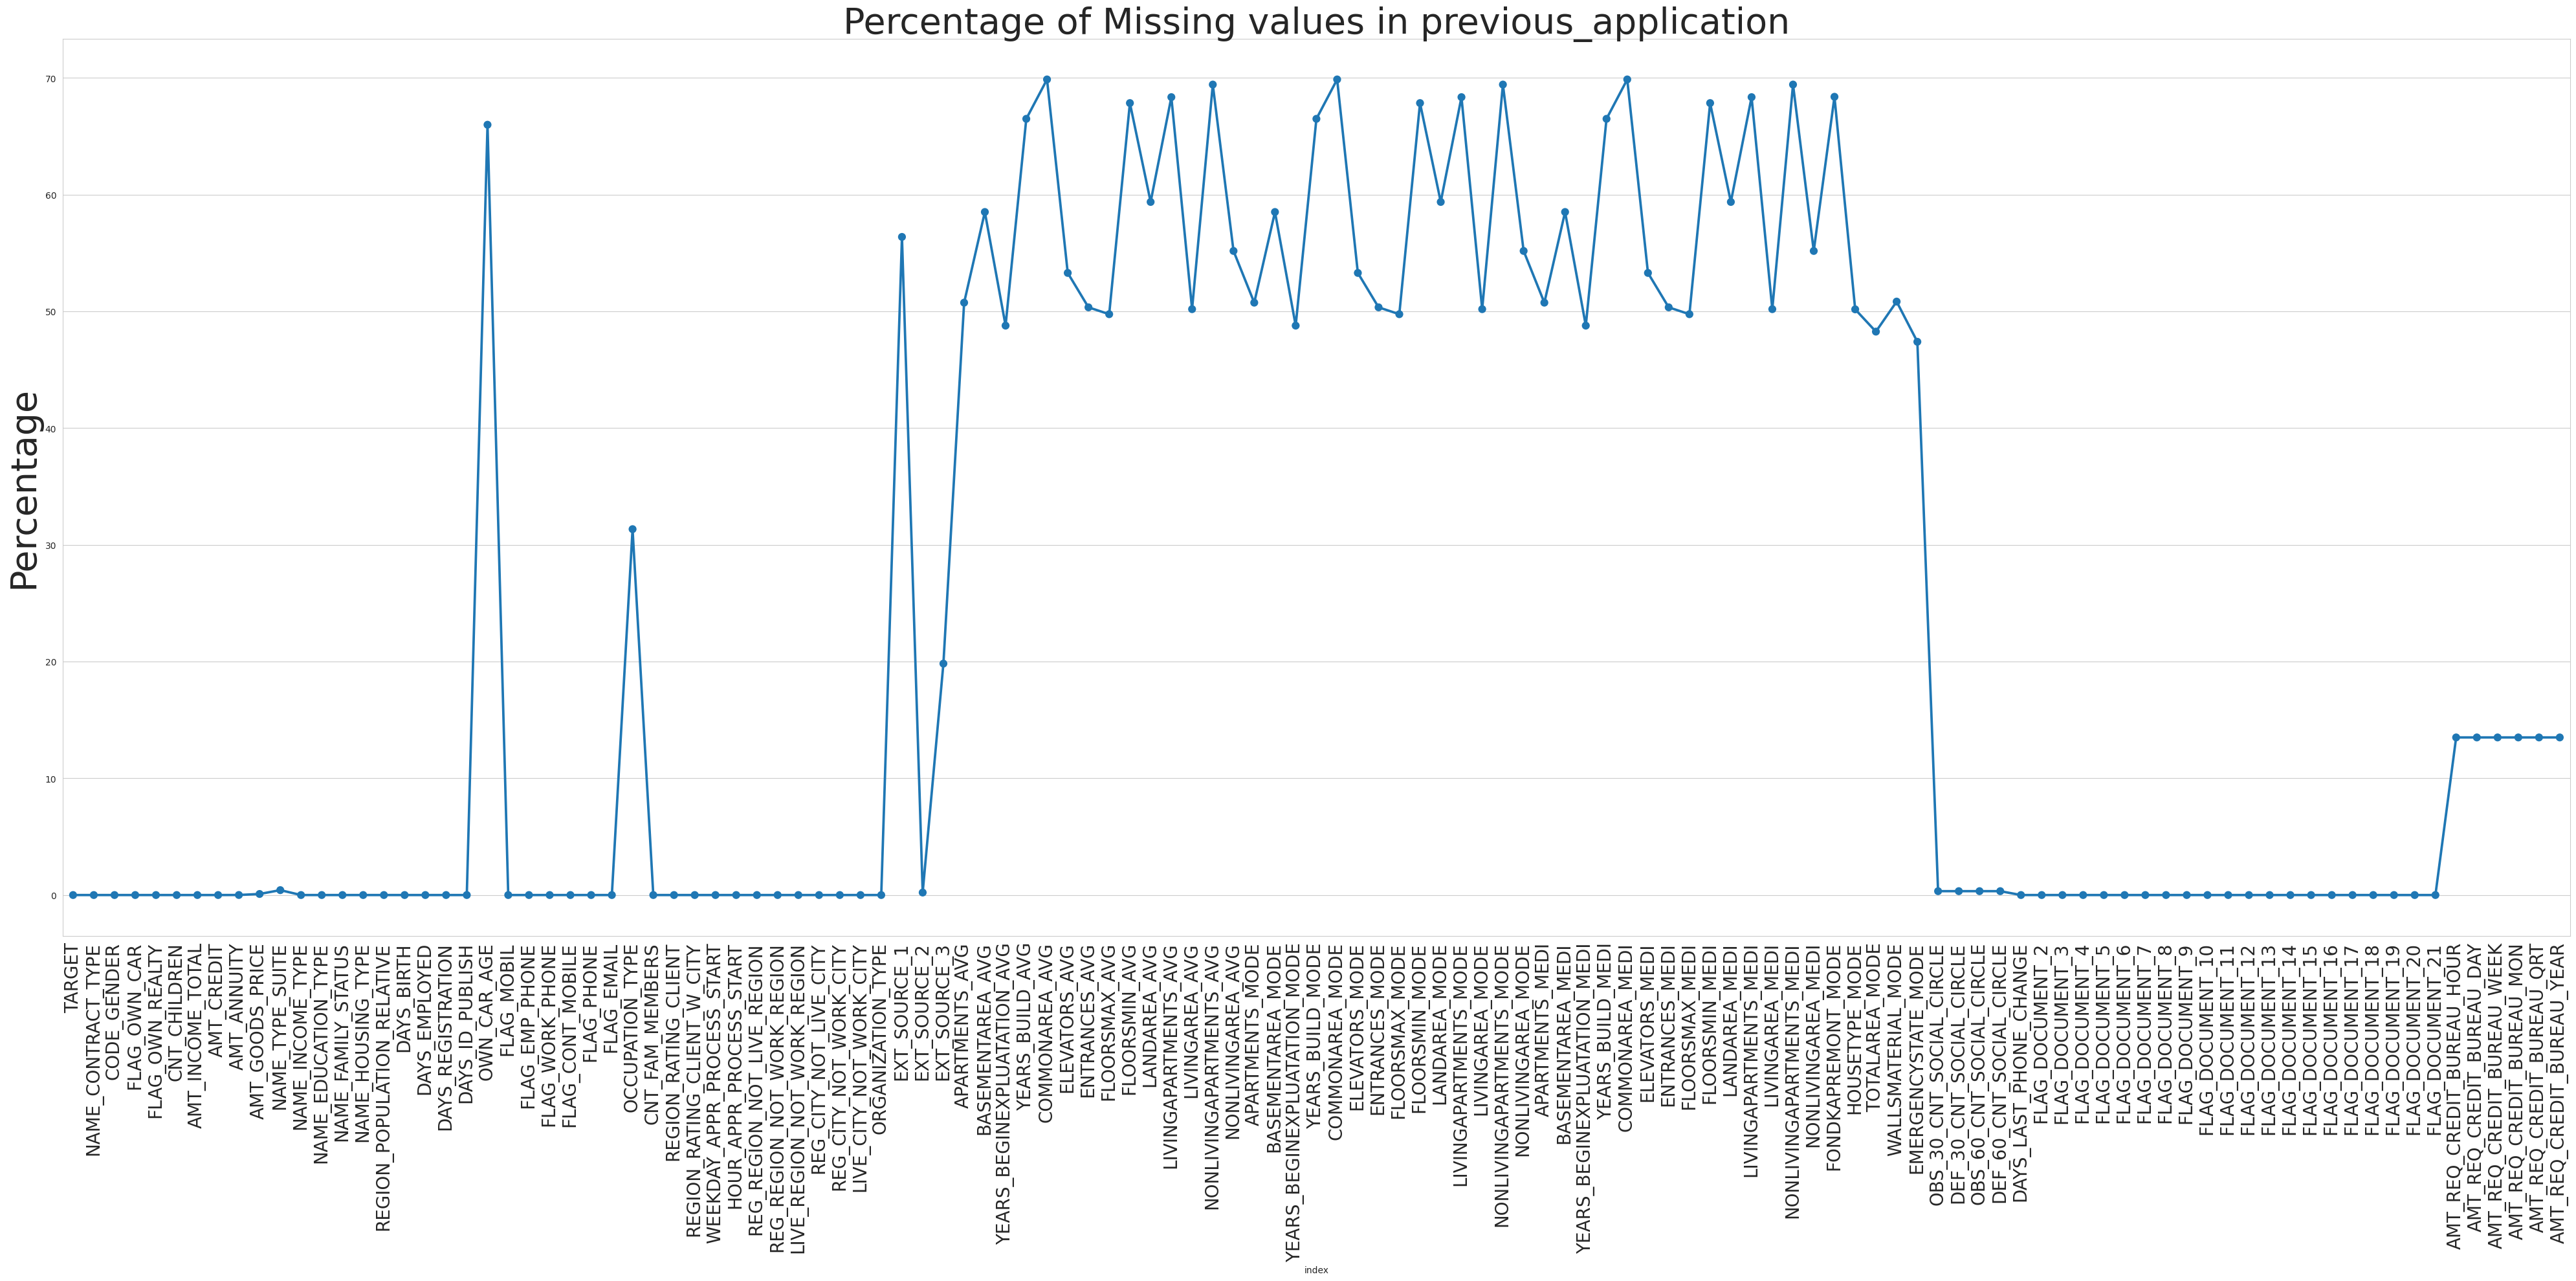

In [ ]:
fig,ax = plt.subplots(figsize=(50,18))
miss_previous_application = pd.DataFrame((loan_data.isnull().sum())*100/loan_data.shape[0]).reset_index()
miss_previous_application["type"] = "loan_data"

sns.pointplot(x="index", y=0, data=miss_previous_application, ax=ax )

# Customize the plot
plt.xticks(rotation=90, fontsize=20)
plt.title("Percentage of Missing values in previous_application" , font = {'size' :40})
plt.ylabel("Percentage" ,font ={'size' : 40})

sns.set_style("whitegrid")


# Show the plot
plt.show()

In [ ]:
drop_columns = []
for i in miss_previous_application.index:
  if miss_previous_application.iloc[i][0] > 18:
   drop_columns.append(miss_previous_application.iloc[i]['index'])

drop_columns

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE

In [ ]:
loan_data = loan_data.drop(drop_columns , axis = 1)

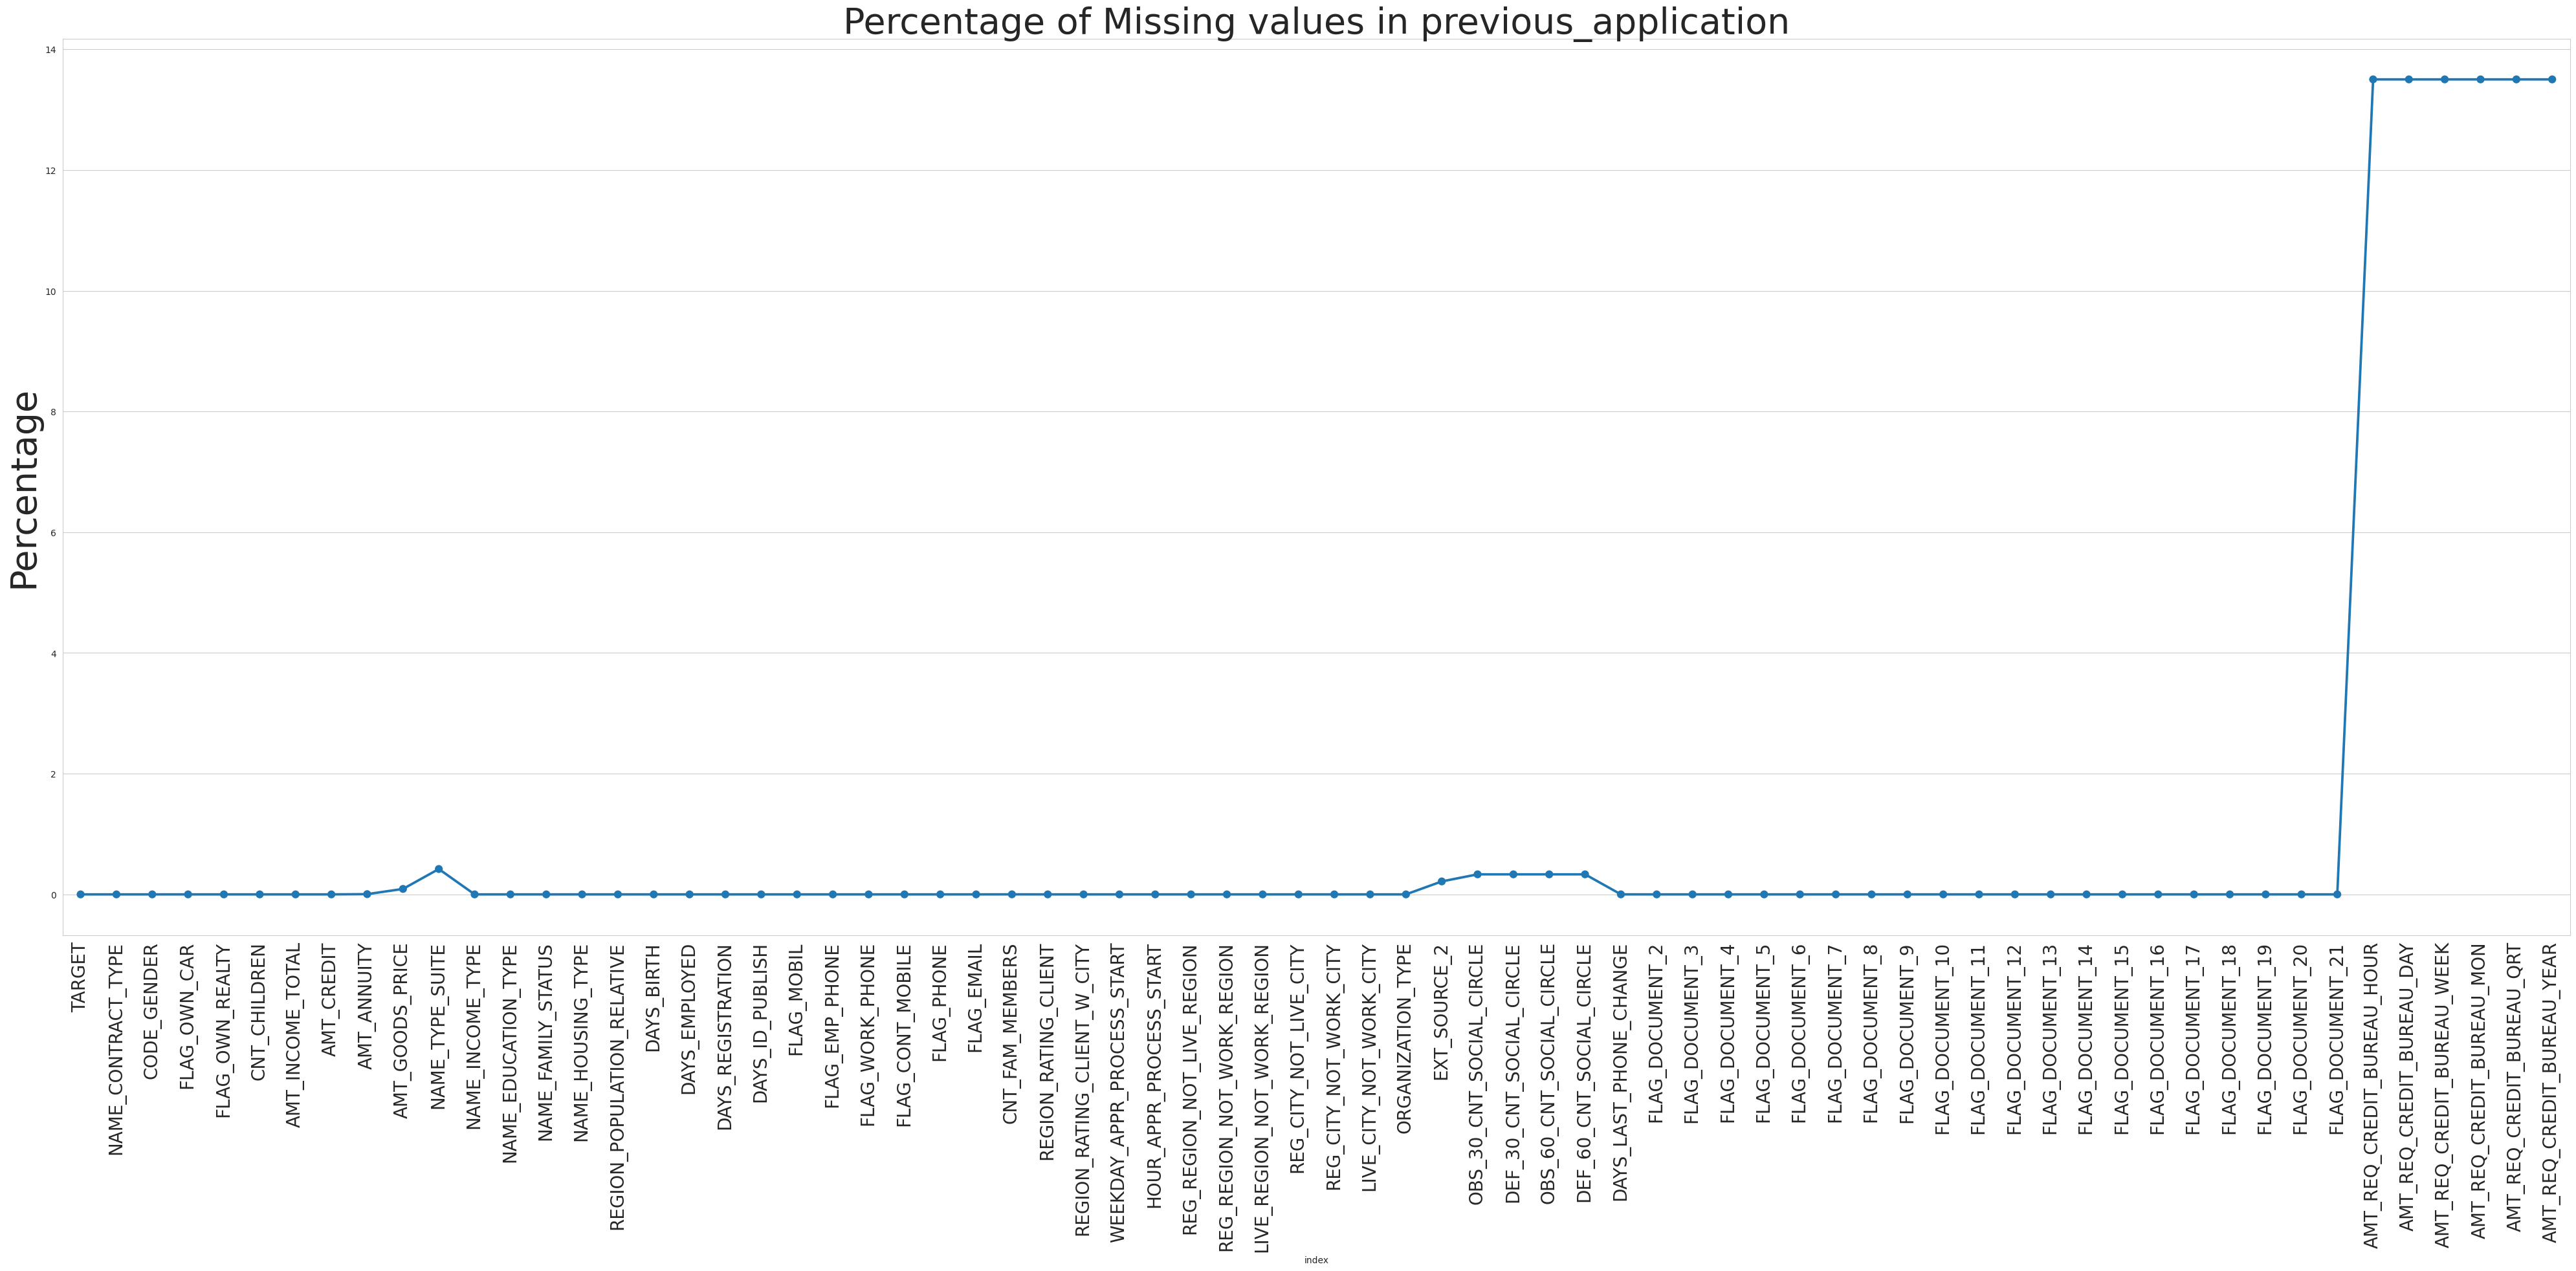

In [ ]:
g,ax = plt.subplots(figsize=(50,18))
miss_previous_application = pd.DataFrame((loan_data.isnull().sum())*100/loan_data.shape[0]).reset_index()
miss_previous_application["type"] = "loan_data"

sns.pointplot(x="index", y=0, data=miss_previous_application, ax=ax )

# Customize the plot
plt.xticks(rotation=90, fontsize=20)
plt.title("Percentage of Missing values in previous_application" , font = {'size' :40})
plt.ylabel("Percentage" ,font ={'size' : 40})

sns.set_style("whitegrid")


# Show the plot
plt.show()

In [ ]:
#for all "AMT_REQ_CREDIT_BUREAU_" for "day","hour","week","qrt","year" have same number of missing values
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,loan_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519


In [ ]:
loan_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [ ]:
loan_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [ ]:
loan_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
loan_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [ ]:
loan_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [ ]:
#we can fill NA values of all this column with 0 values
columns_to_fill = [
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK'
]

# Fill missing values with 0 in the specified columns
loan_data[columns_to_fill] = loan_data[columns_to_fill].fillna(0)

In [ ]:
loan_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = loan_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)

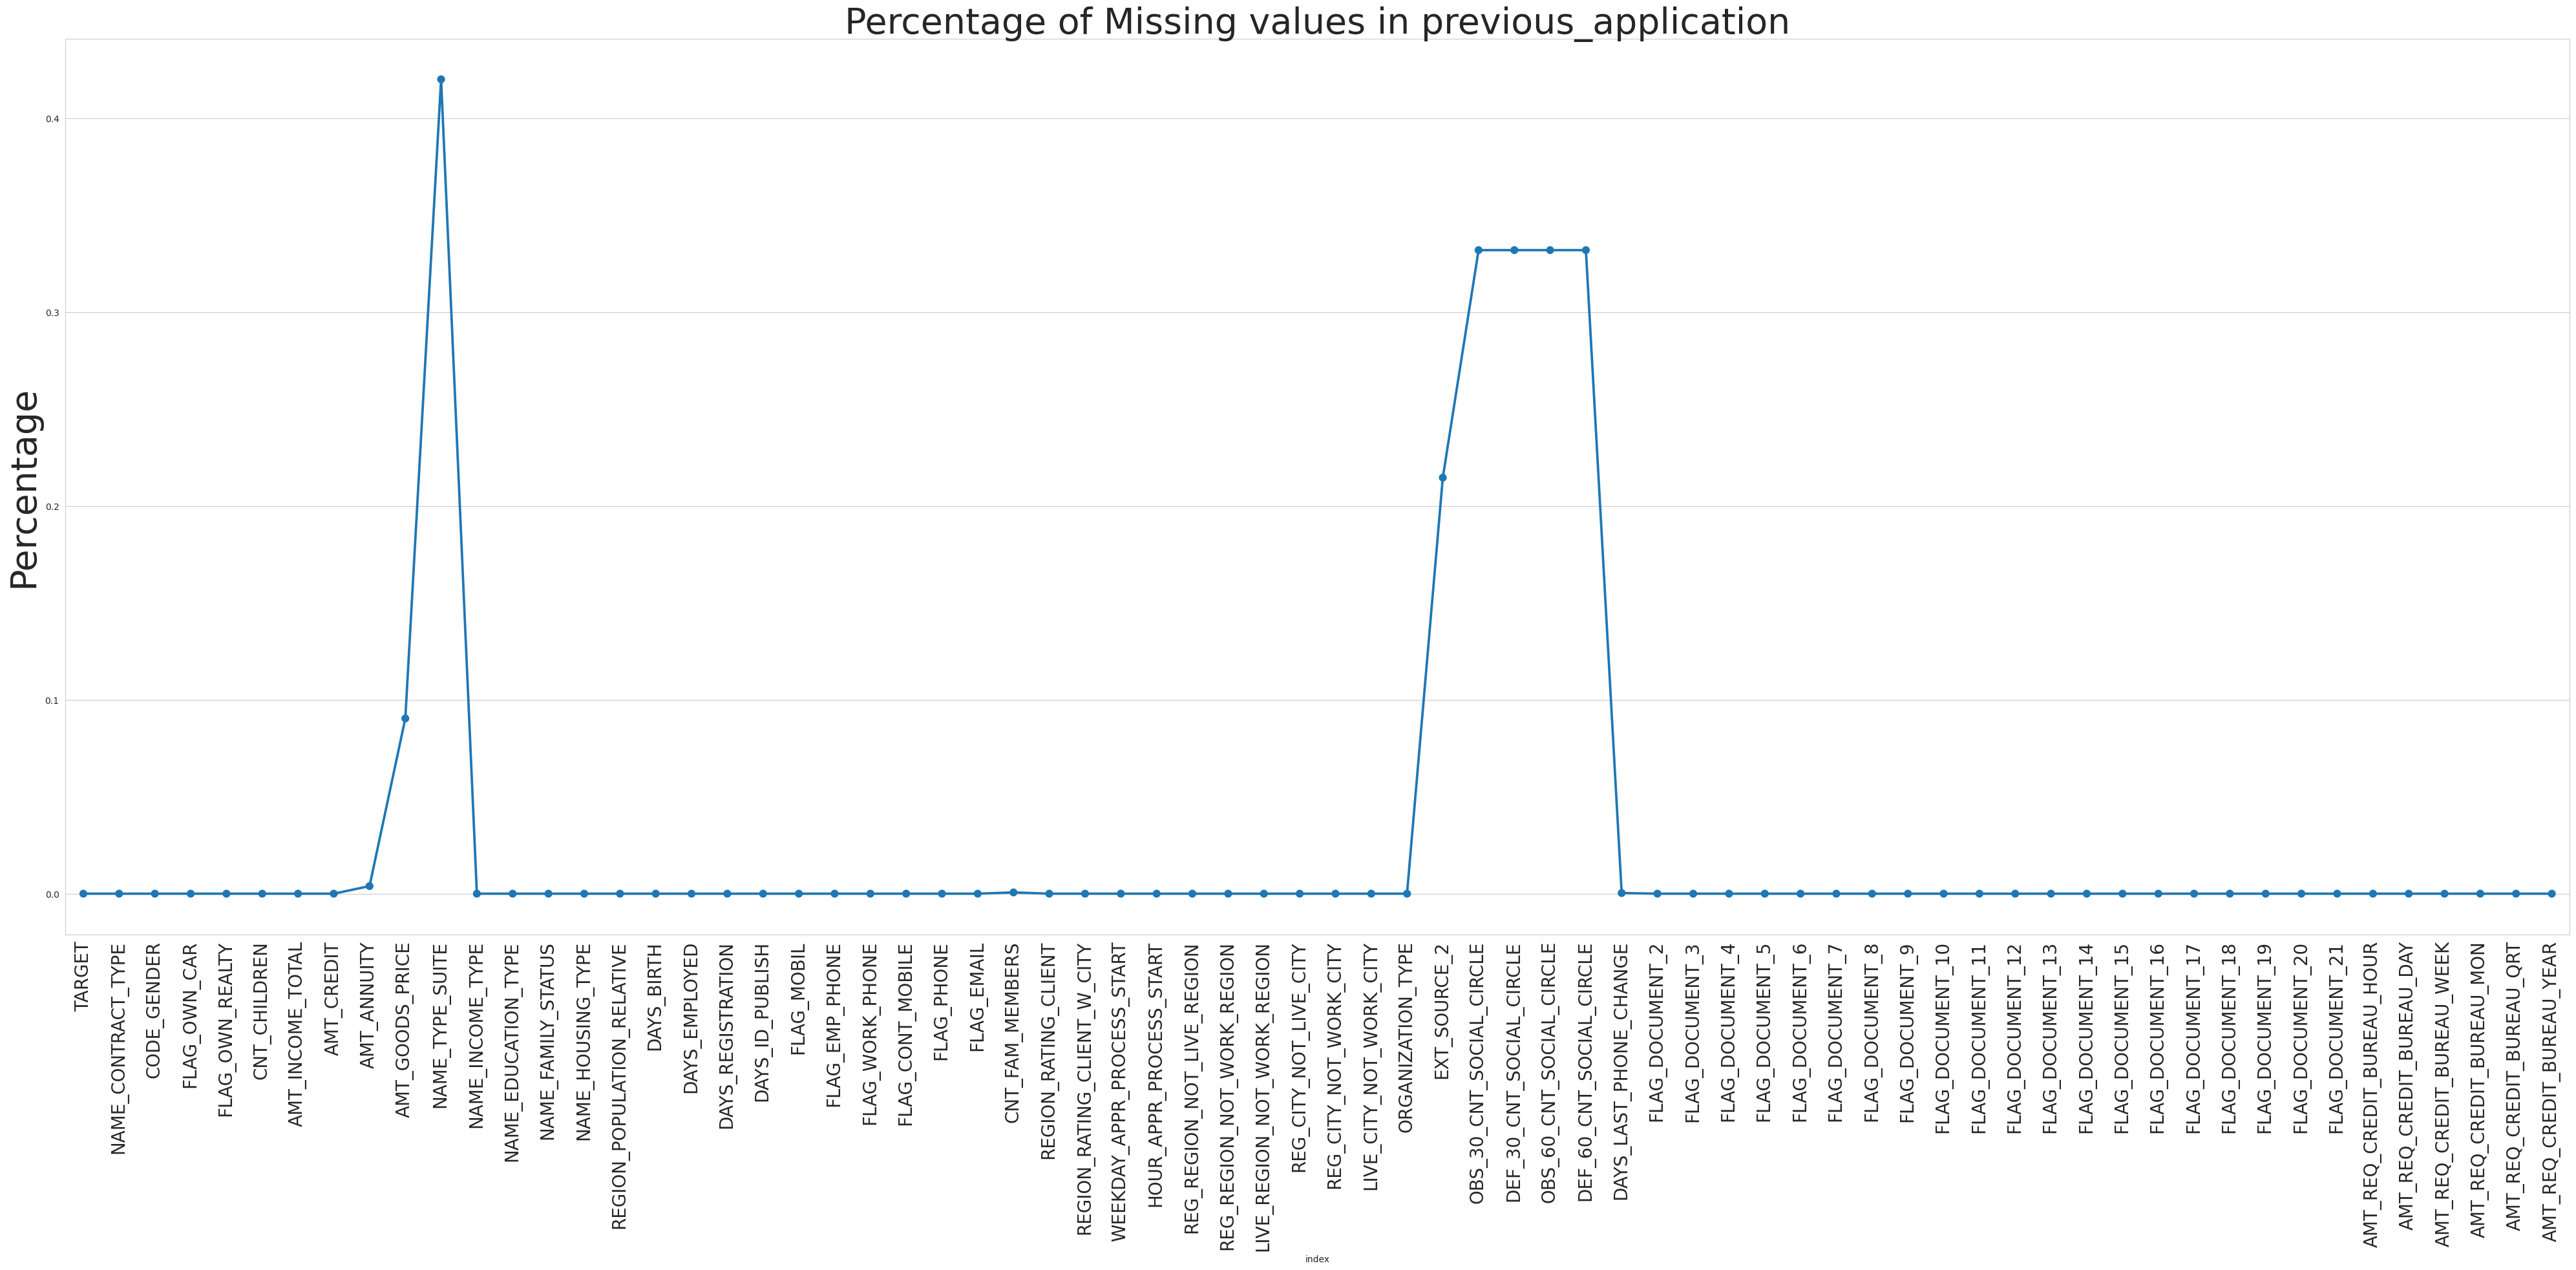

In [ ]:
g,ax = plt.subplots(figsize=(50,18))
miss_previous_application = pd.DataFrame((loan_data.isnull().sum())*100/loan_data.shape[0]).reset_index()
miss_previous_application["type"] = "loan_data"

sns.pointplot(x="index", y=0, data=miss_previous_application, ax=ax )

# Customize the plot
plt.xticks(rotation=90, fontsize=20)
plt.title("Percentage of Missing values in previous_application" , font = {'size' :40})
plt.ylabel("Percentage" ,font ={'size' : 40})

sns.set_style("whitegrid")


# Show the plot
plt.show()

In [ ]:
# Dropping rows with any NaN or missing value values
loan_data.dropna(inplace=True)

#checking any missing data and dtypes info details
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       304531 non-null  int64  
 1   NAME_CONTRACT_TYPE           304531 non-null  object 
 2   CODE_GENDER                  304531 non-null  object 
 3   FLAG_OWN_CAR                 304531 non-null  object 
 4   FLAG_OWN_REALTY              304531 non-null  object 
 5   CNT_CHILDREN                 304531 non-null  int64  
 6   AMT_INCOME_TOTAL             304531 non-null  float64
 7   AMT_CREDIT                   304531 non-null  float64
 8   AMT_ANNUITY                  304531 non-null  float64
 9   AMT_GOODS_PRICE              304531 non-null  float64
 10  NAME_TYPE_SUITE              304531 non-null  object 
 11  NAME_INCOME_TYPE             304531 non-null  object 
 12  NAME_EDUCATION_TYPE          304531 non-null  object 
 13 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/previous_application.csv"
actual_data = pd.read_csv(path)

In [ ]:
#our data is mostly cleaned so moving to EDA and data processing

#segregating columns with float or numerical values to that of categorical or object datatype columns
numerical_columns = [cols for cols in loan_data.columns if loan_data[cols].dtype == int or loan_data[cols].dtype == float]
categorical_columns = [cols for cols in loan_data.columns if loan_data[cols].dtype == 'object']

print(f"Categorical Columns : {categorical_columns} \nNumerical Columns : {numerical_columns}")

Categorical Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'] 
Numerical Columns : ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DO

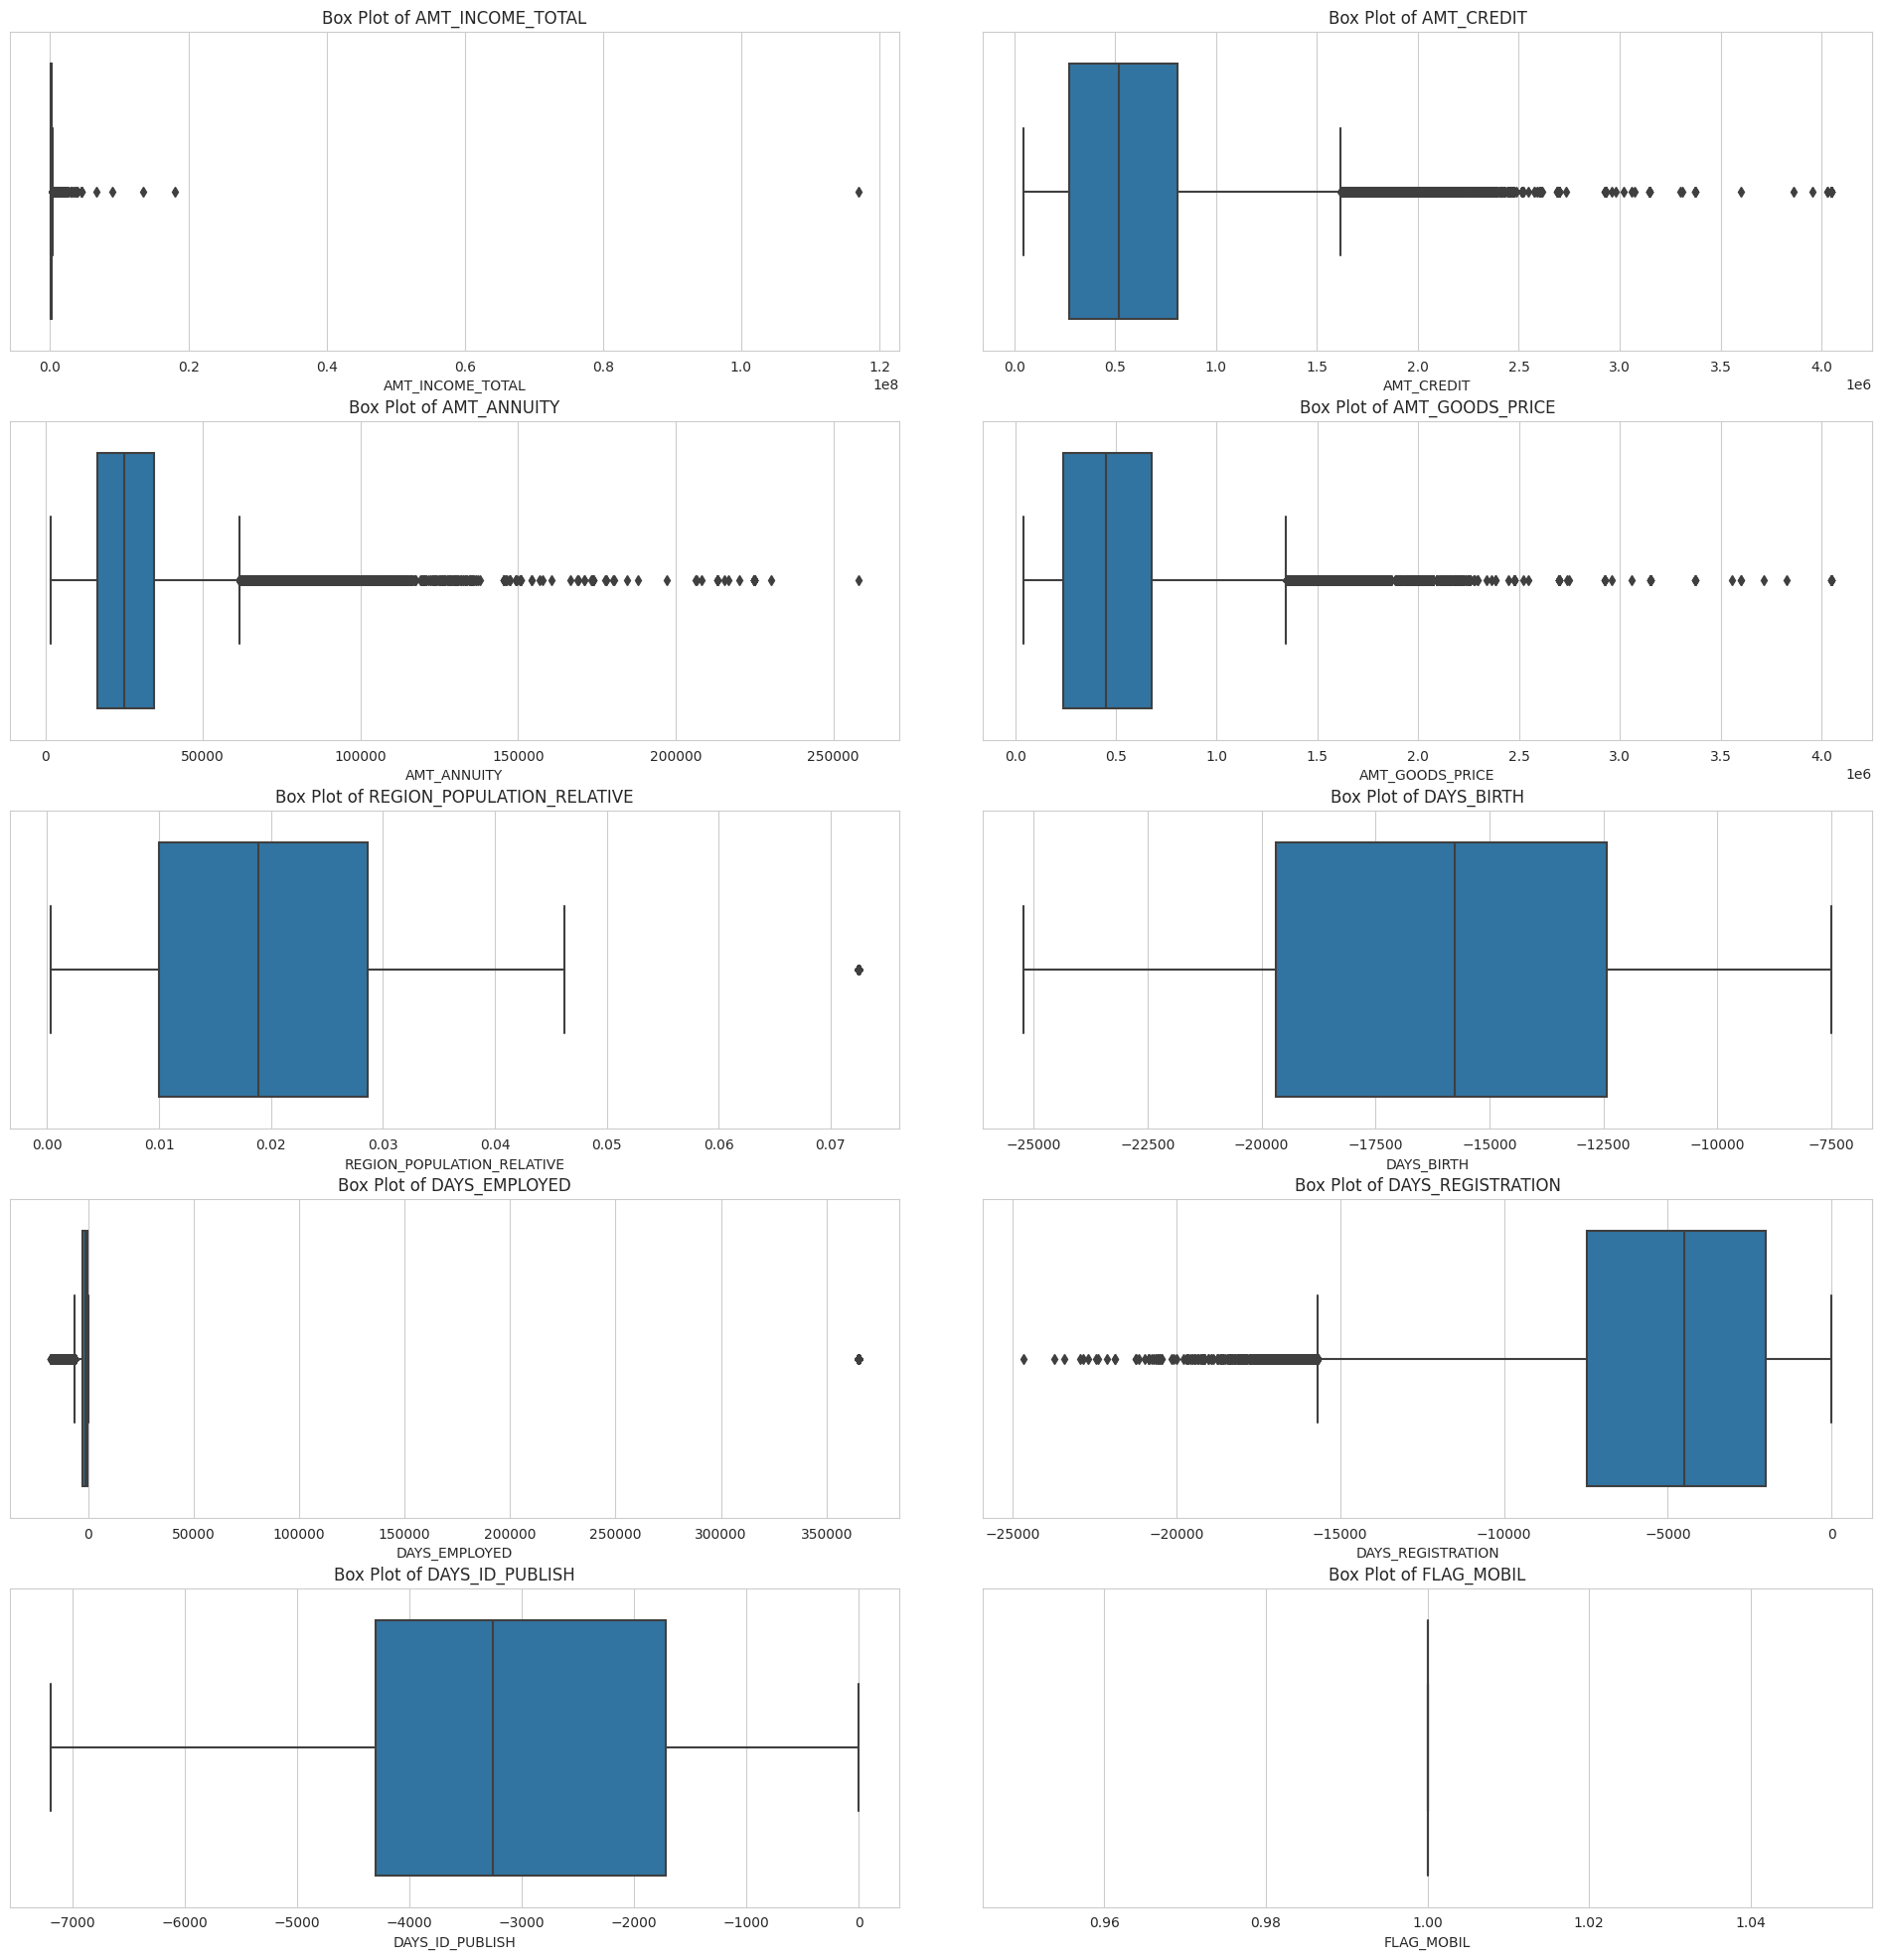

In [ ]:
#lets verify whether outliers are removed or not visually
import seaborn as sns

num_columns = numerical_columns[:12]
numerical_columns = numerical_columns[2:12]
# Calculate the number of rows and columns for the subplot grid
num_cols = len(numerical_columns)
num_rows = (num_cols - 1) // 2 + 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20))
fig.tight_layout(pad=3.0)  # Adjust the spacing between subplots


# Loop through each column and create a box plot in the corresponding subplot
for i, col in enumerate(numerical_columns):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    sns.boxplot(data=loan_data, x=col, ax=ax)
    ax.set_title(f"Box Plot of {col}")

# Remove any unused subplots
for i in range(len(numerical_columns), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       304531 non-null  int64  
 1   NAME_CONTRACT_TYPE           304531 non-null  object 
 2   CODE_GENDER                  304531 non-null  object 
 3   FLAG_OWN_CAR                 304531 non-null  object 
 4   FLAG_OWN_REALTY              304531 non-null  object 
 5   CNT_CHILDREN                 304531 non-null  int64  
 6   AMT_INCOME_TOTAL             304531 non-null  float64
 7   AMT_CREDIT                   304531 non-null  float64
 8   AMT_ANNUITY                  304531 non-null  float64
 9   AMT_GOODS_PRICE              304531 non-null  float64
 10  NAME_TYPE_SUITE              304531 non-null  object 
 11  NAME_INCOME_TYPE             304531 non-null  object 
 12  NAME_EDUCATION_TYPE          304531 non-null  object 
 13 

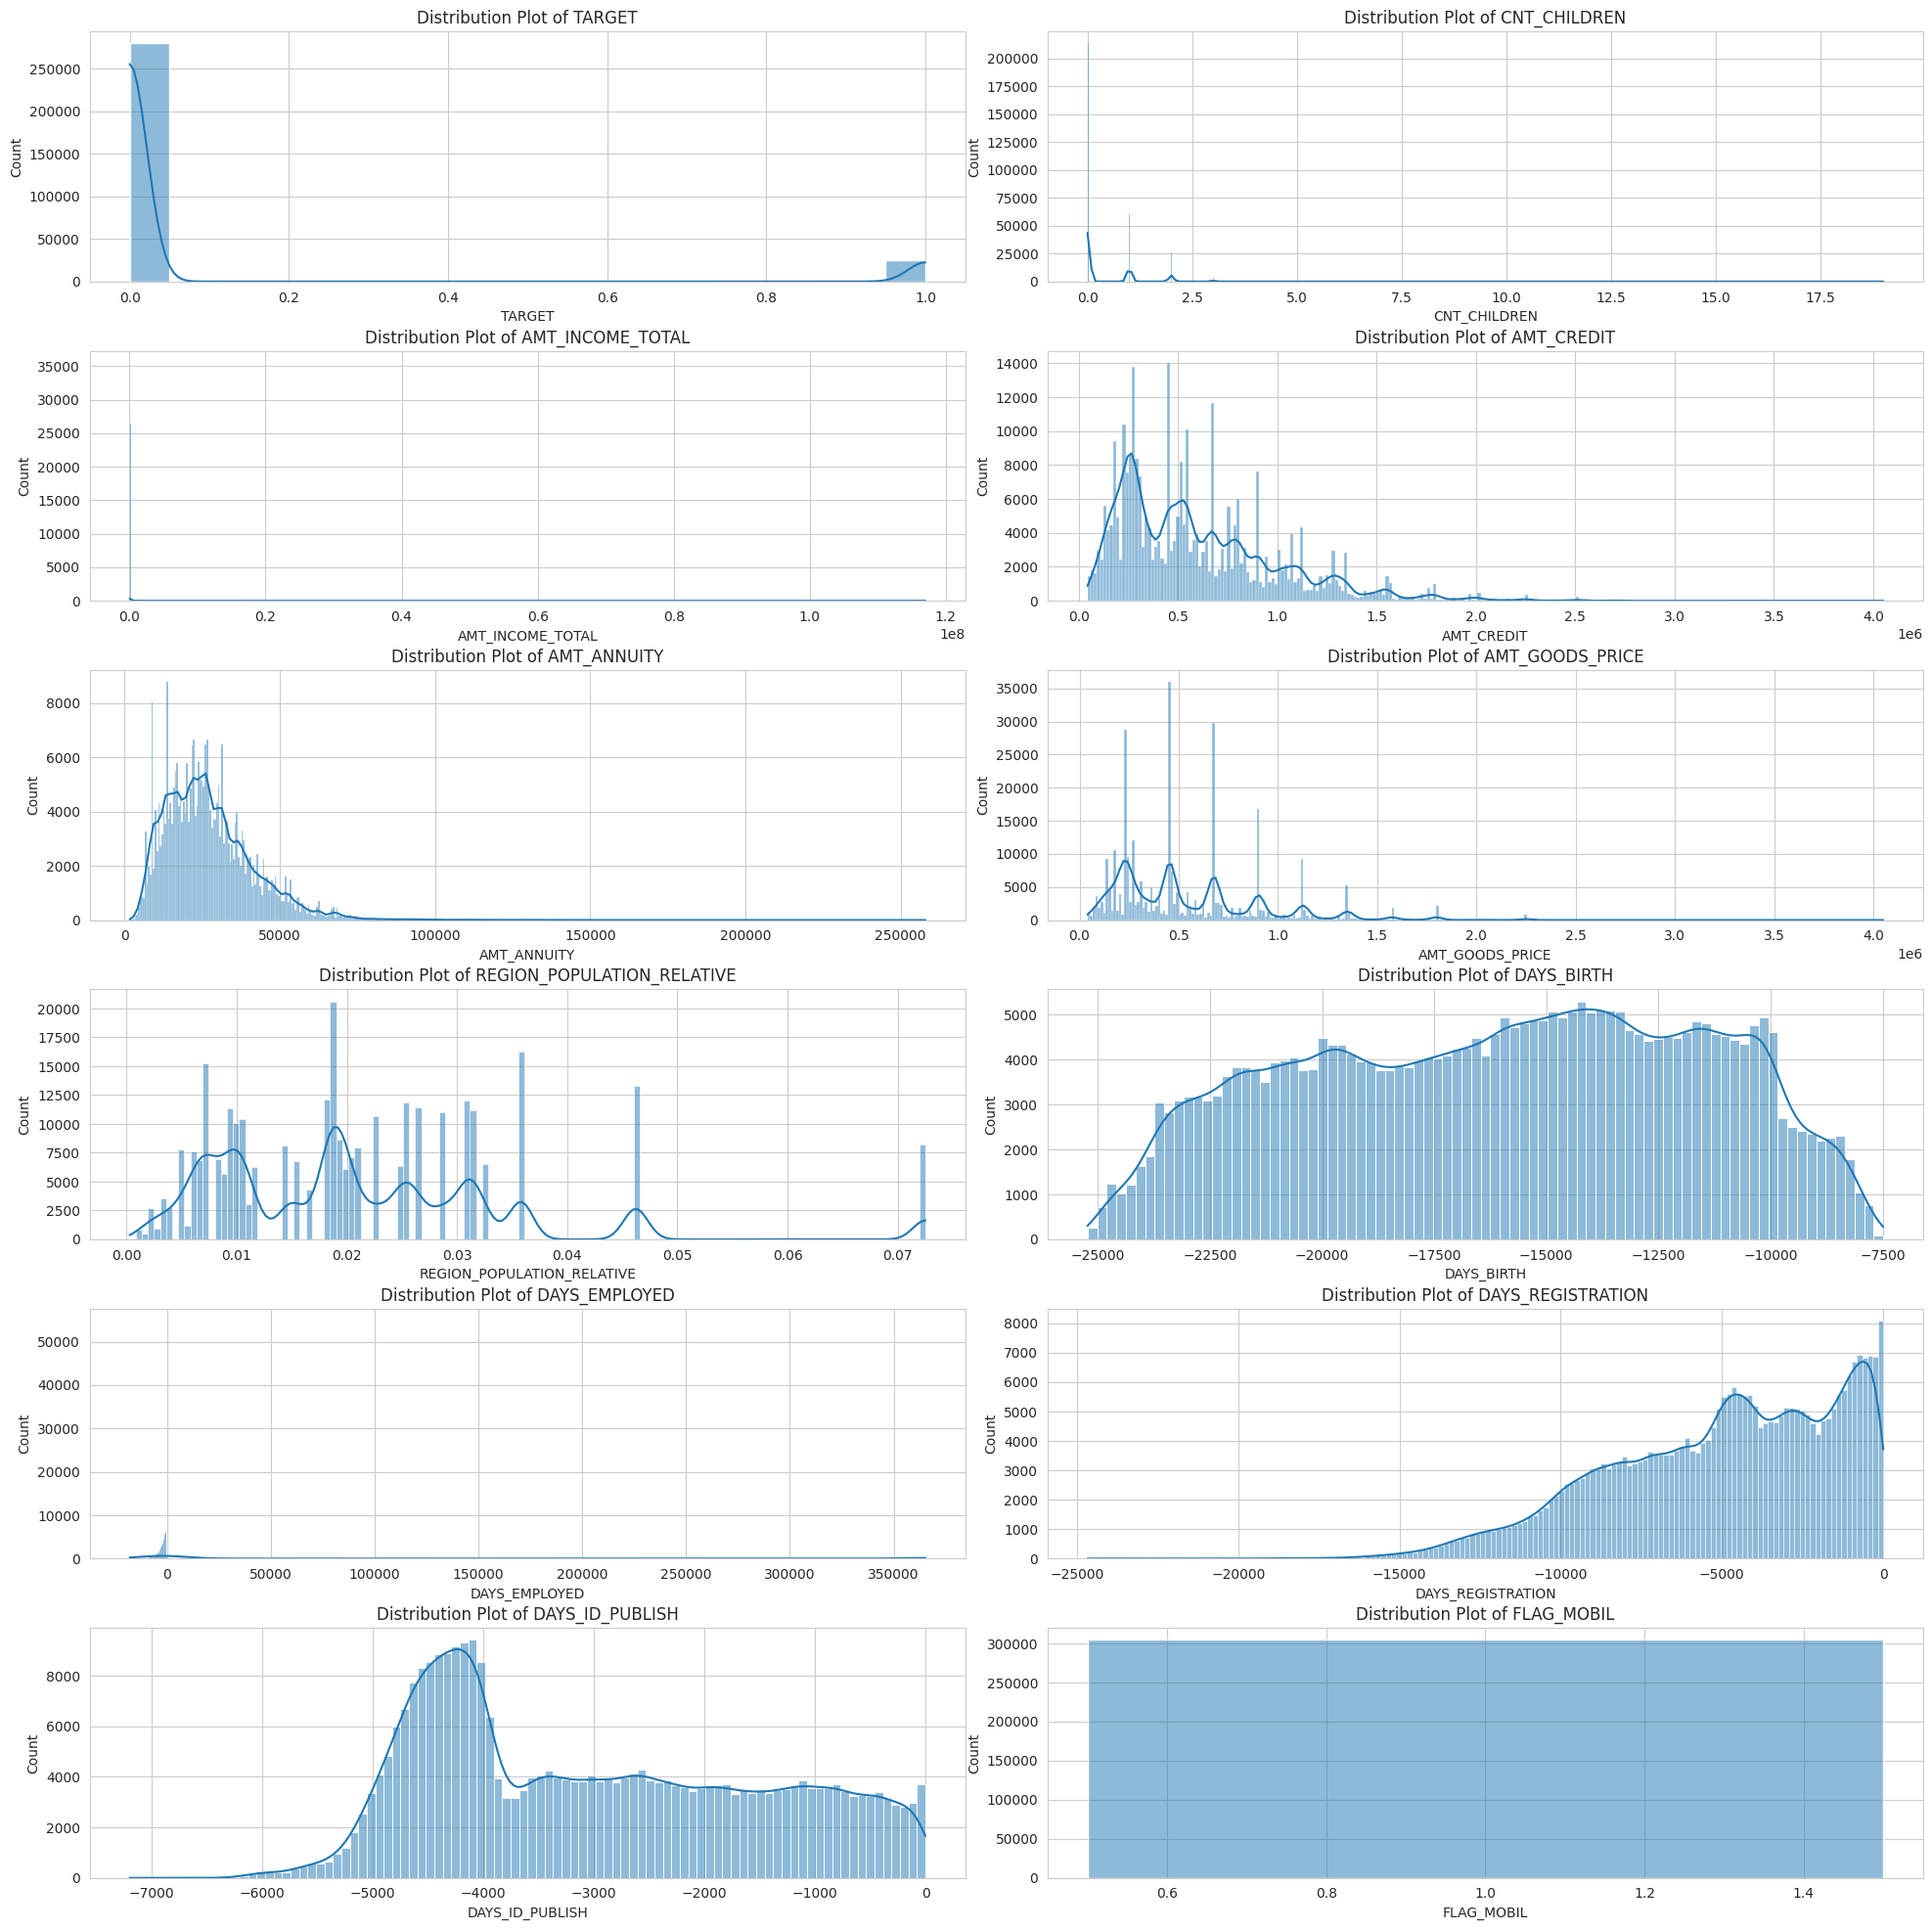

In [ ]:
#distribution plots for each of these numerical columns to measure their skewness and curtoisis
# Calculate the number of rows and columns for the subplot grid
num_cols = len(num_columns)
num_rows = (num_cols - 1) // 2 + 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20))
fig.tight_layout(pad=3.0)  # Adjust the spacing between subplots

# Loop through each column and create a box plot in the corresponding subplot
for i, col in enumerate(num_columns):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    sns.histplot(data = loan_data[col] , ax=ax , kde = True )
    ax.set_title(f"Distribution Plot of {col}")

# Remove any unused subplots
for i in range(len(num_columns), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()

<Axes: >

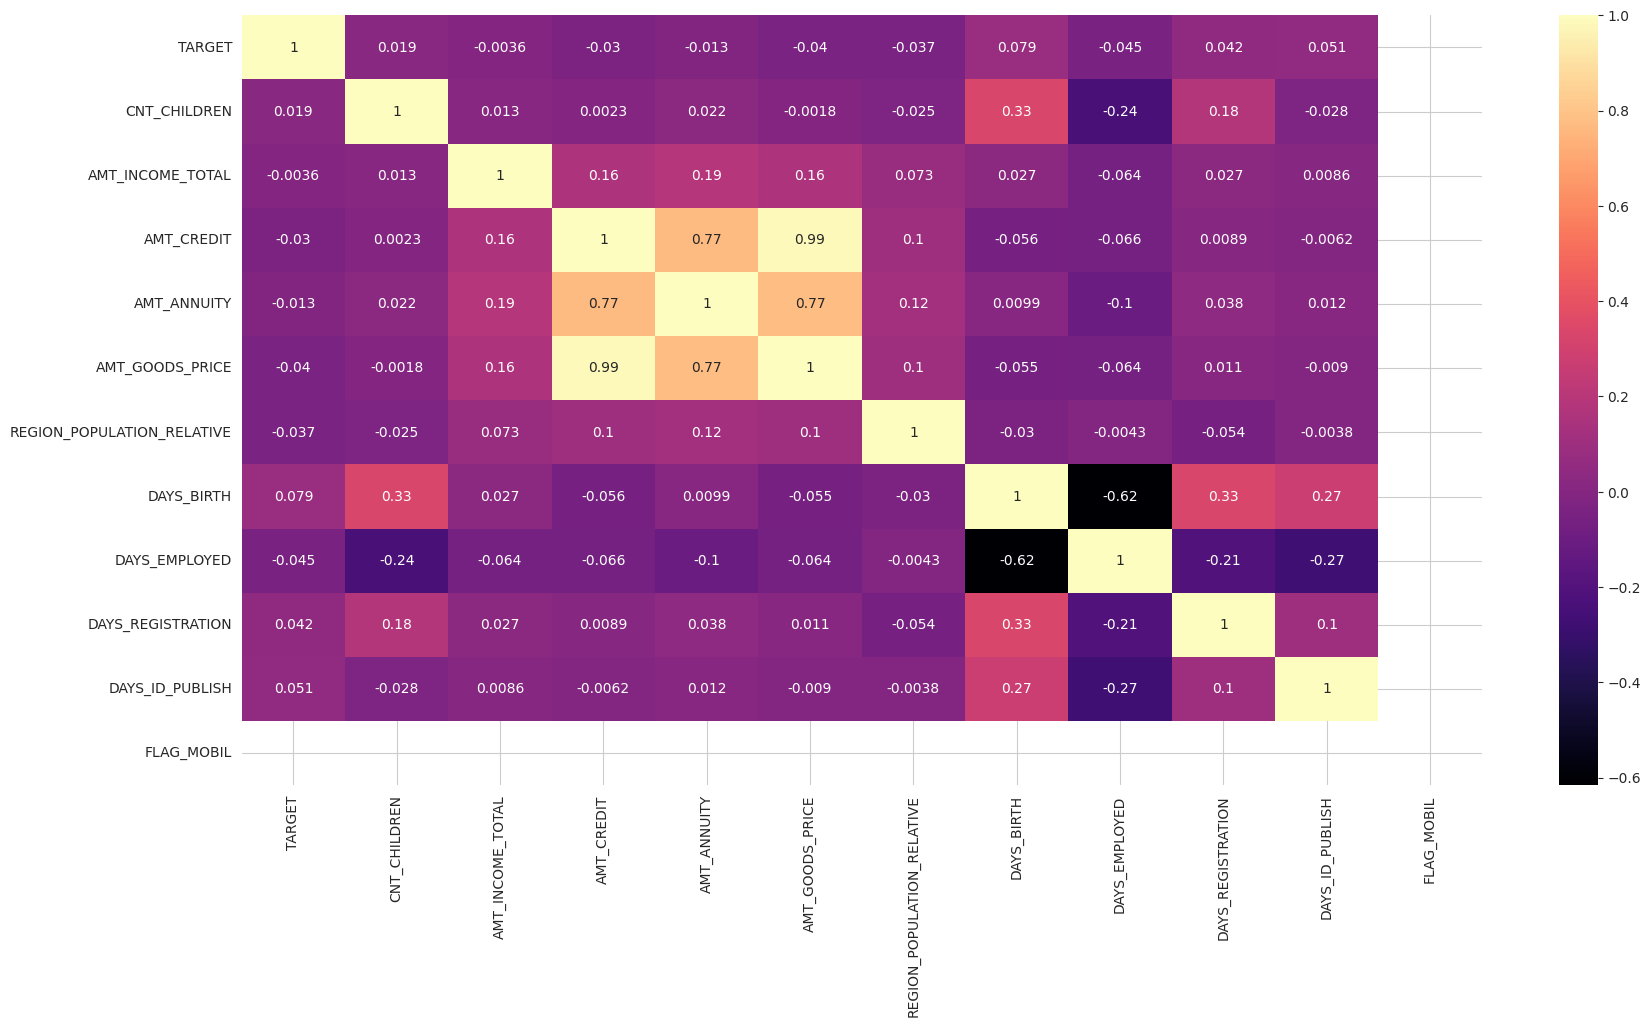

In [ ]:
#lets see how these features are correlated or dependent on each other using heat-map
plt.figure(figsize = (20,10))
c = loan_data[num_columns].corr()
sns.heatmap(c , cmap = 'magma' , annot = True)

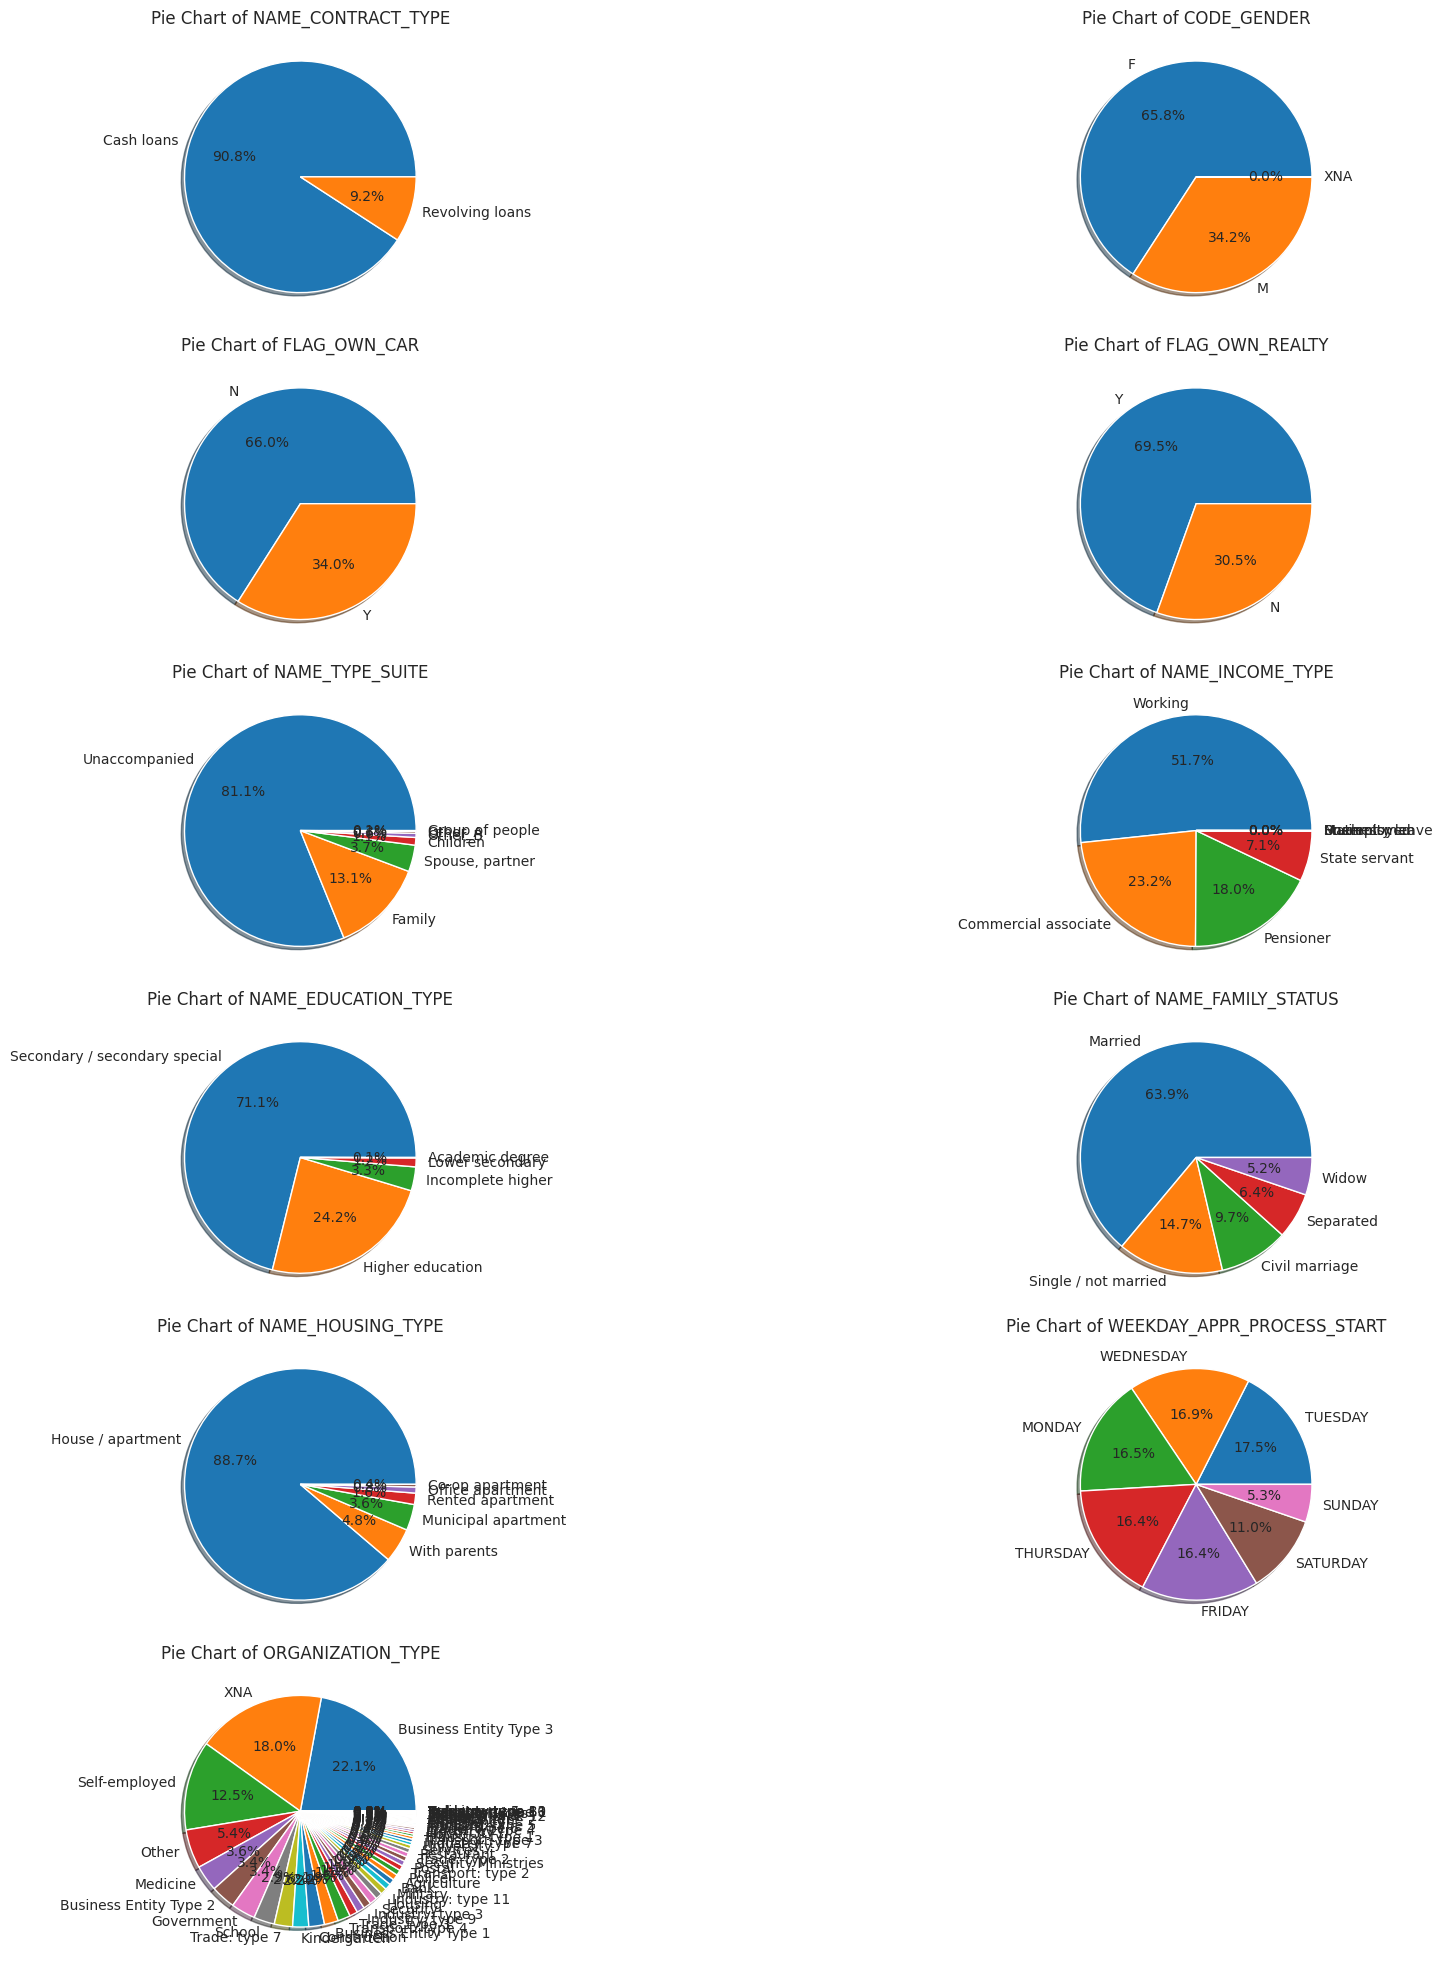

In [ ]:
#lets see how our categorical features are balance or unbalanced so that necessary processing can be followed
# Calculate the number of rows and columns for the subplot grid
num_cols = len(categorical_columns)
num_rows = (num_cols - 1) // 2 + 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20))
fig.tight_layout(pad=3.0)  # Adjust the spacing between subplots

# Loop through each column and create a box plot in the corresponding subplot
for i, col in enumerate(categorical_columns):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    index = loan_data[col].value_counts().index
    values = loan_data[col].value_counts().values
    ax.pie(values, labels = index , autopct='%1.1f%%', shadow=True, radius=1 )
    plt.tight_layout()
    ax.set_title(f"Pie Chart of {col}")

# Remove any unused subplots
for i in range(len(categorical_columns), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
categories = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
loan_data.drop("NAME_CONTRACT_TYPE" , axis = 1 , inplace = True)

In [ ]:
loan_data['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
loan_data['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
loan_data['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
loan_data['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [ ]:
loan_data['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [ ]:
loan_data['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
loan_data['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [ ]:
loan_data['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [ ]:
loan_data['WEEKDAY_APPR_PROCESS_START'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [ ]:
loan_data['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Police', 'Business Entity Type 1',
       'Postal', 'Transport: type 3', 'Industry: type 4', 'Agriculture',
       'Restaurant', 'Culture', 'Hotel', 'Industry: type 7',
       'Trade: type 3', 'Industry: type 3', 'Bank', 'Industry: type 9',
       'Insurance', 'Trade: type 6', 'Industry: type 2',
       'Transport: type 1', 'Industry: type 12', 'Mobile',
       'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [ ]:
#lets label encode target variables and other necessary features
loan_data['FLAG_OWN_REALTY'] = loan_data['FLAG_OWN_REALTY'].replace({'Y':1,'N':0})
loan_data['FLAG_OWN_CAR'] = loan_data['FLAG_OWN_CAR'].replace({'Y':1,'N':0})


#lets perform one-hot encoding on necesary categories
loan_data = pd.concat([loan_data,pd.get_dummies(loan_data['ORGANIZATION_TYPE'])],axis=1)
loan_data = pd.concat([loan_data,pd.get_dummies(loan_data['NAME_HOUSING_TYPE'])],axis=1)
loan_data = pd.concat([loan_data,pd.get_dummies(loan_data['NAME_FAMILY_STATUS'])],axis=1)
loan_data = pd.concat([loan_data,pd.get_dummies(loan_data['NAME_EDUCATION_TYPE'])],axis=1)
loan_data = pd.concat([loan_data,pd.get_dummies(loan_data['NAME_INCOME_TYPE'])],axis=1)
loan_data = pd.concat([loan_data,pd.get_dummies(loan_data['NAME_TYPE_SUITE'])],axis=1)
loan_data = pd.concat([loan_data,pd.get_dummies(loan_data['CODE_GENDER'])],axis=1)



In [ ]:
loan_data.drop(columns = ['CODE_GENDER','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], inplace = True)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


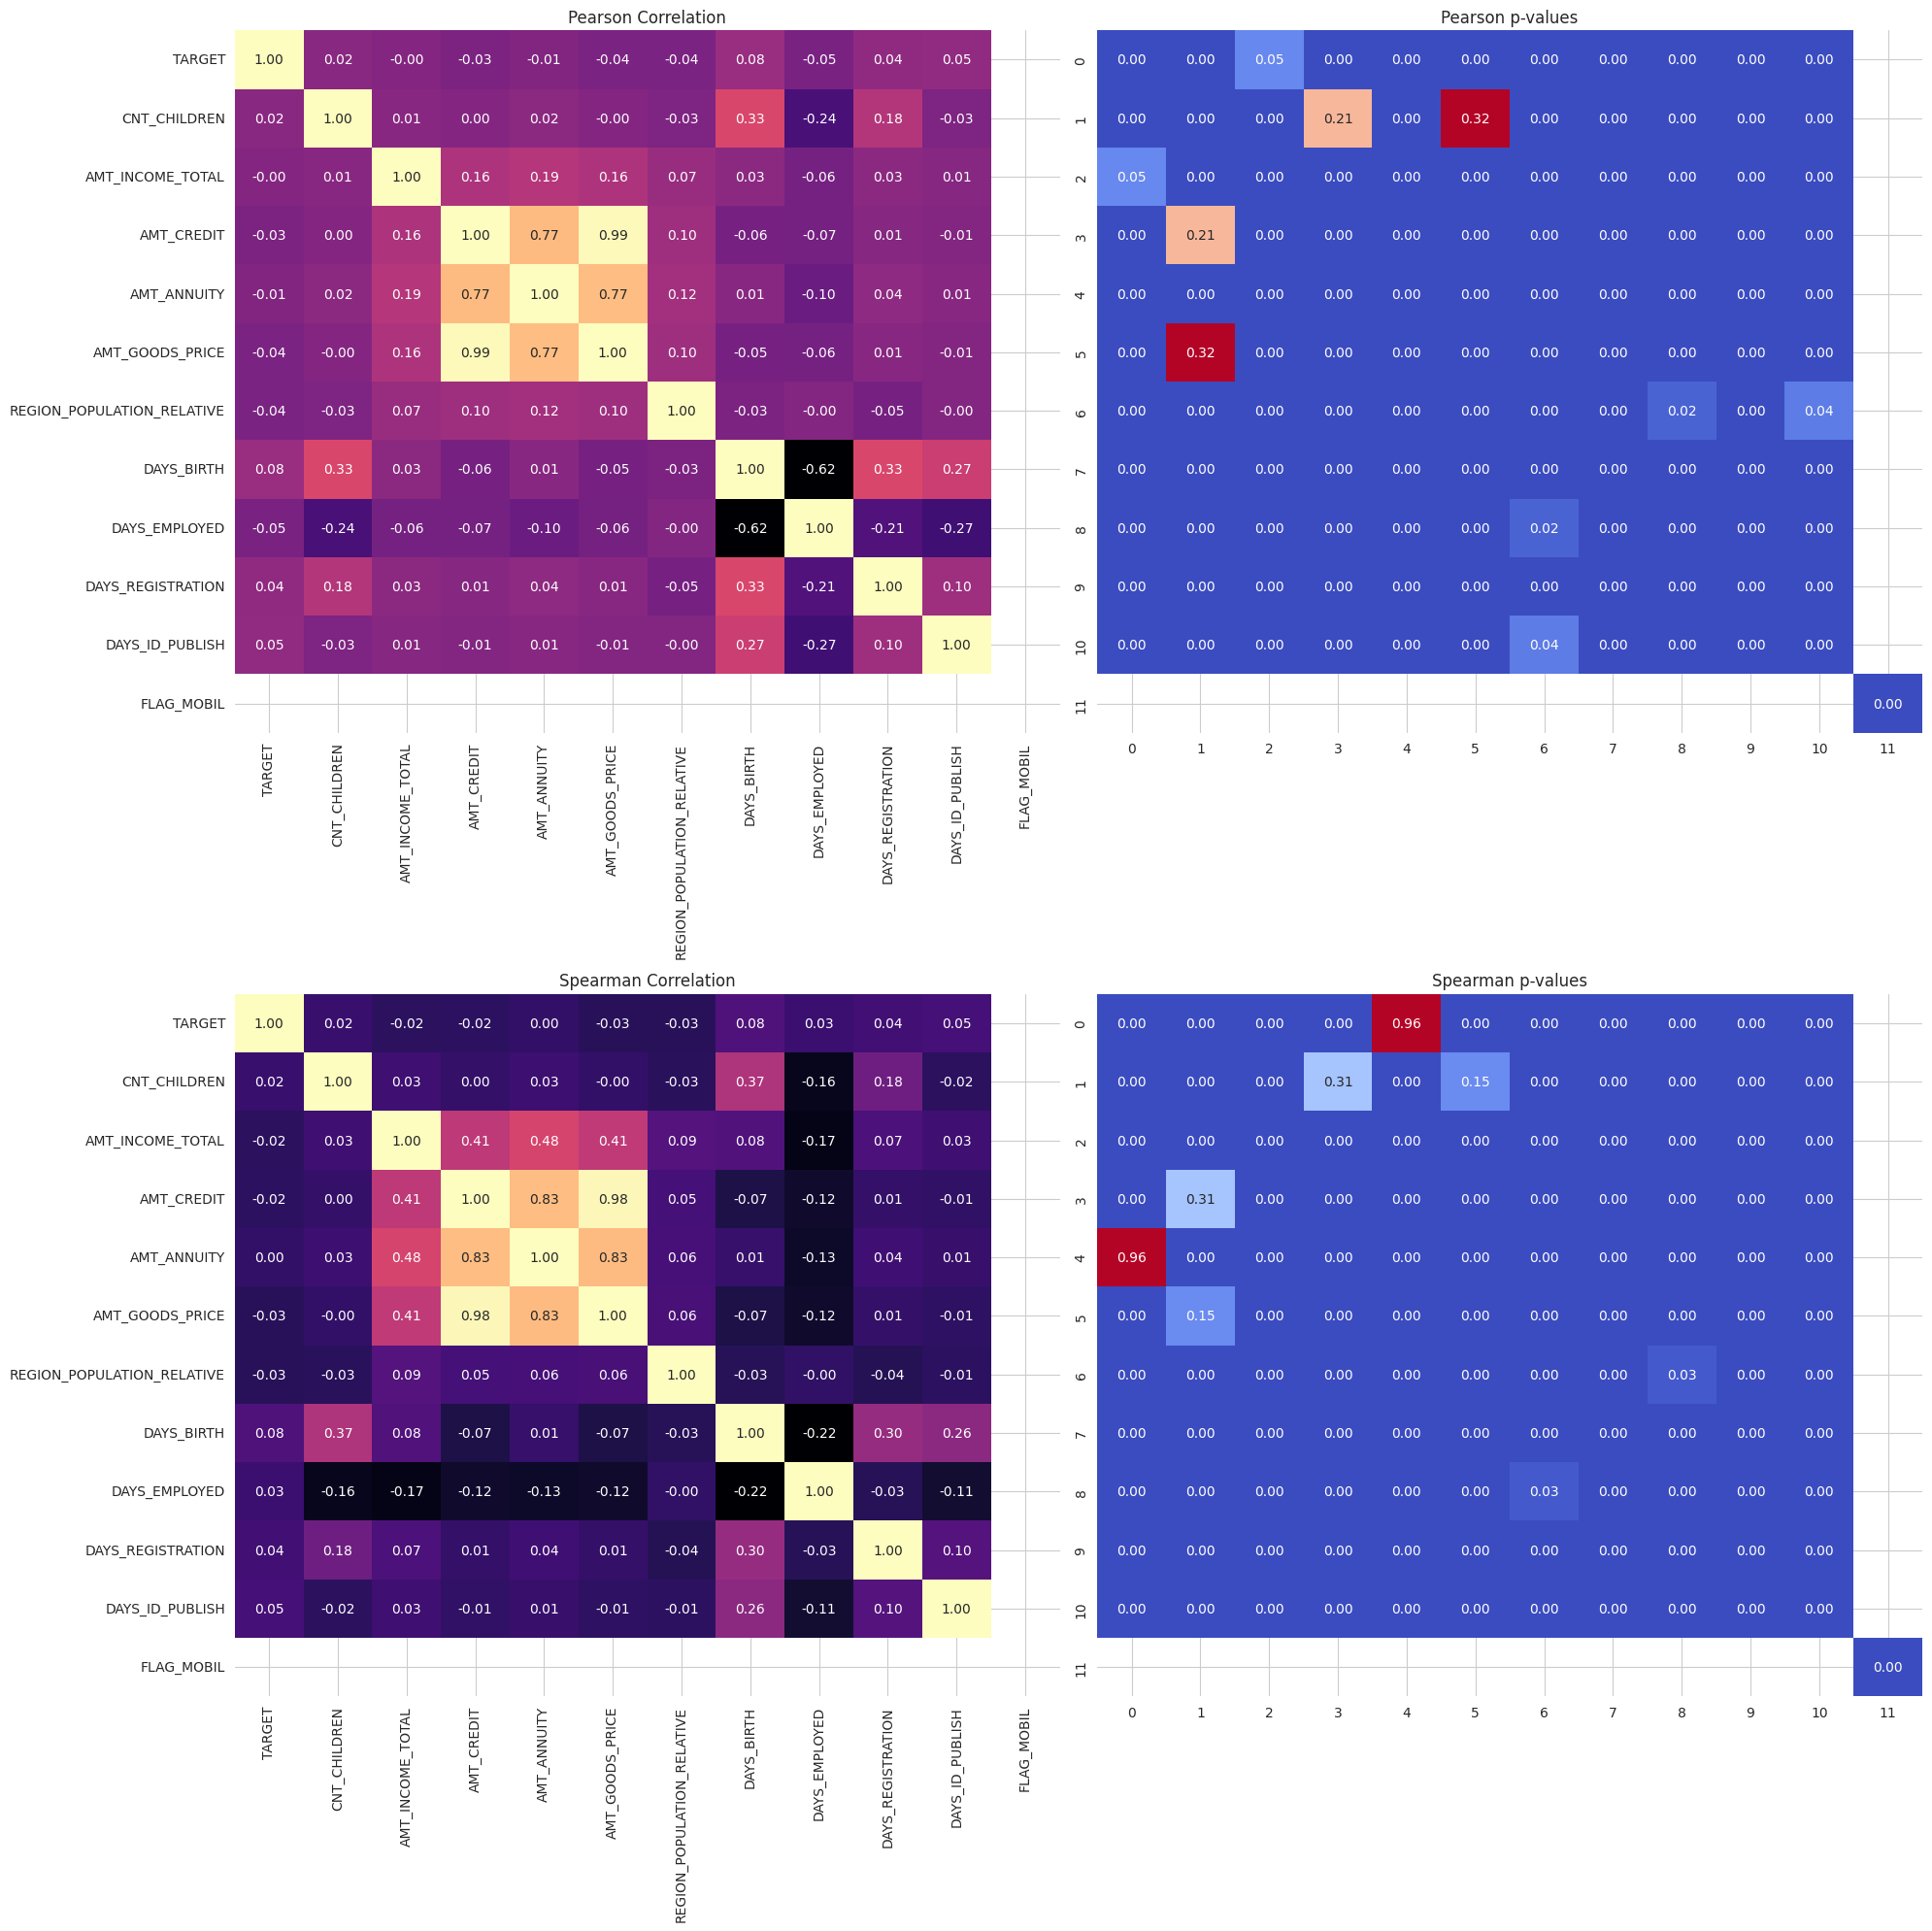

In [ ]:
#lets analyze numerical features in more detail using:

#pearson correlation coefficients with their confidence p-values to measure their linear relationship
#spearman correlation coefficients with their confidence p-values to measure their monotonic relationship either in oppposite or along with it.

# Pearson correlation matrix and p-values
c_data = loan_data[num_columns]

pearson_corr = c_data.corr('pearson')

pearson_p_values = np.zeros_like(pearson_corr)
for i in range(len(c_data.columns)):
    for j in range(i + 1, len(c_data.columns)):
        corr, p_value = stats.pearsonr(c_data[c_data.columns[i]], c_data[c_data.columns[j]])
        pearson_p_values[i, j] = pearson_p_values[j, i] = p_value

# Spearman correlation matrix and p-values
spearman_corr = c_data.corr('spearman')

spearman_p_values = np.zeros_like(spearman_corr)
for i in range(len(c_data.columns)):
    for j in range(i + 1, len(c_data.columns)):
        corr, p_value = stats.spearmanr(c_data[c_data.columns[i]], c_data[c_data.columns[j]])
        spearman_p_values[i, j] = spearman_p_values[j, i] = p_value

# Creating a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Heatmap of  Pearson Correlation coefficients
sns.heatmap(pearson_corr, ax=axes[0,0], cmap='magma', annot=True, fmt=".2f", cbar=False)
axes[0,0].set_title('Pearson Correlation')

# Heatmap of Pearson p-values
sns.heatmap(pearson_p_values, ax=axes[0, 1], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[0, 1].set_title('Pearson p-values')

# Heatmap of Spearman Correlation coefficients
sns.heatmap(spearman_corr, ax=axes[1,0], cmap='magma', annot=True, fmt=".2f", cbar=False)
axes[1,0].set_title('Spearman Correlation')

# Heatmap of Spearman p-values
sns.heatmap(spearman_p_values, ax=axes[1, 1], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[1, 1].set_title('Spearman p-values')

plt.tight_layout()
plt.show()

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Columns: 153 entries, TARGET to XNA
dtypes: float64(19), int64(42), uint8(92)
memory usage: 170.8 MB


In [ ]:
#Using principal component analysis to reduce the dimensionality of the one-hot encoded categorical variables losing some of the variances,
#but simultaneously, using a couple of principal components instead of tens of one-hot encoded features to construct a better model

one_hot_encoded = loan_data.iloc[:,12:]

n_components = 5

pca_list = list()
feature_weight_list = list()

for n in range(1,6):

  PCAmod = PCA(n_components = n)
  PCAmod.fit(one_hot_encoded)

  pca_list.append(pd.Series({
      'n' : n,
      'model' : PCAmod,
      'var' : PCAmod.explained_variance_ratio_.sum()
  }))

  weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
  overall_contributions = np.abs(PCAmod.components_)*weights
  abs_feature_values = overall_contributions.sum(axis = 0)
  feature_weight_list.append(pd.DataFrame({
      'n' : n,
      'features' : one_hot_encoded.columns ,
      'values' : abs_feature_values / abs_feature_values.sum(),
  }))

pca_report = pd.concat(pca_list, axis = 1).T.set_index('n')
# feature_importance_report = pd.concat(feature_weight_list).pivot(index = 'n' , columns = 'features' , values = 'values')
pca_report

model       var
n                               
1  PCA(n_components=1)  0.771694
2  PCA(n_components=2)  0.999989
3  PCA(n_components=3)  0.999993
4  PCA(n_components=4)  0.999996
5  PCA(n_components=5)  0.999997

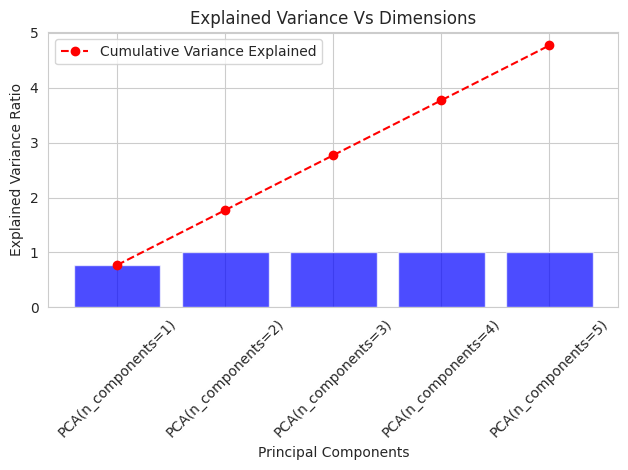

In [ ]:
value = pca_report['var']
model = pca_report.index
models = pca_report['model']

plt.bar(model,value, color='b', alpha=0.7)

cumulative_sum = value.cumsum()
plt.plot(model, cumulative_sum, marker='o', color='r', label='Cumulative Variance Explained', linestyle='--')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Vs Dimensions')
plt.legend(loc='upper left')

plt.xticks(model, models, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
feature_importance_report = pd.concat(feature_weight_list)
feature_importance_report = feature_importance_report.groupby(['n', 'features']).agg({'values': 'mean'}).reset_index()
feature_importance_report = feature_importance_report.pivot_table(index='n', columns='features', values='values')
feature_importance_report

features  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
n                                                                 
1                      1.906315e-07                8.368676e-08   
2                      1.782200e-07                1.265230e-07   
3                      1.784572e-07                1.267557e-07   
4                      1.786772e-07                1.279460e-07   
5                      1.790020e-07                1.281839e-07   

features  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
n                                                                
1                          0.000011                   0.000008   
2                          0.000018                   0.000008   
3                          0.000018                   0.000008   
4                          0.000018                   0.000008   
5                          0.000018                   0.000008   

features  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  \
n                                                                  
1                       8.383239e-07                    0.000076   
2                       9.623893e-07                    0.000114   
3                       9.626594e-07                    0.000114   
4                       9.630735e-07                    0.000114   
5                       9.673554e-07                    0.000115   

features  Academic degree   Advertising   Agriculture      Bank  \
n                                                                 
1            6.637524e-09  1.186029e-07  3.237068e-07  0.000002   
2            6.174716e-09  1.040118e-07  4.459886e-07  0.000002   
3            6.307059e-09  1.042056e-07  4.465066e-07  0.000002   
4            6.382848e-09  1.044174e-07  4.477994e-07  0.000002   
5            6.451292e-09  1.044404e-07  4.480133e-07  0.000002   

features  Business Entity Type 1  Business Entity Type 2  \
n                                                          
1                   1.174691e-06                0.000001   
2                   9.852293e-07                0.000002   
3                   9.862763e-07                0.000002   
4                   9.898042e-07                0.000002   
5                   9.902613e-07                0.000002   

features  Business Entity Type 3   Businessman  CNT_FAM_MEMBERS      Children  \
n                                                                               
1                       0.000020  1.560581e-09         0.000012  7.098740e-07   
2                       0.000017  2.704163e-09         0.000015  7.774562e-07   
3                       0.000017  2.726312e-09         0.000015  7.776763e-07   
4                       0.000017  2.747702e-09         0.000015  7.777494e-07   
5                       0.000017  2.761767e-09         0.000015  7.782703e-07   

features  Civil marriage      Cleaning  Co-op apartment  Commercial associate  \
n                                                                               
1               0.000002  6.773524e-08     2.528372e-07              0.000022   
2               0.000002  8.868311e-08     2.018569e-07              0.000020   
3               0.000002  8.870844e-08     2.019251e-07              0.000020   
4               0.000002  8.871990e-08     2.024886e-07              0.000020   
5               0.000002  8.880923e-08     2.027585e-07              0.000020   

features  Construction       Culture  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  \
n                                                                               
1             0.000001  6.826338e-08         0.934787                0.064427   
2             0.000001  8.301430e-08         0.736050                0.263115   
3             0.000001  8.301427e-08         0.736045                0.263113   
4             0.000001  8.307886e-08         0.736042                0.263112   
5             0.000001  8.318444e-08         0.736041                0.263111

[Text(0.5, 0, 'Number of components'),
 Text(0, 0.5, 'Relative Importance'),
 Text(0.5, 1.0, 'Feature Importance Vs Dimensions')]

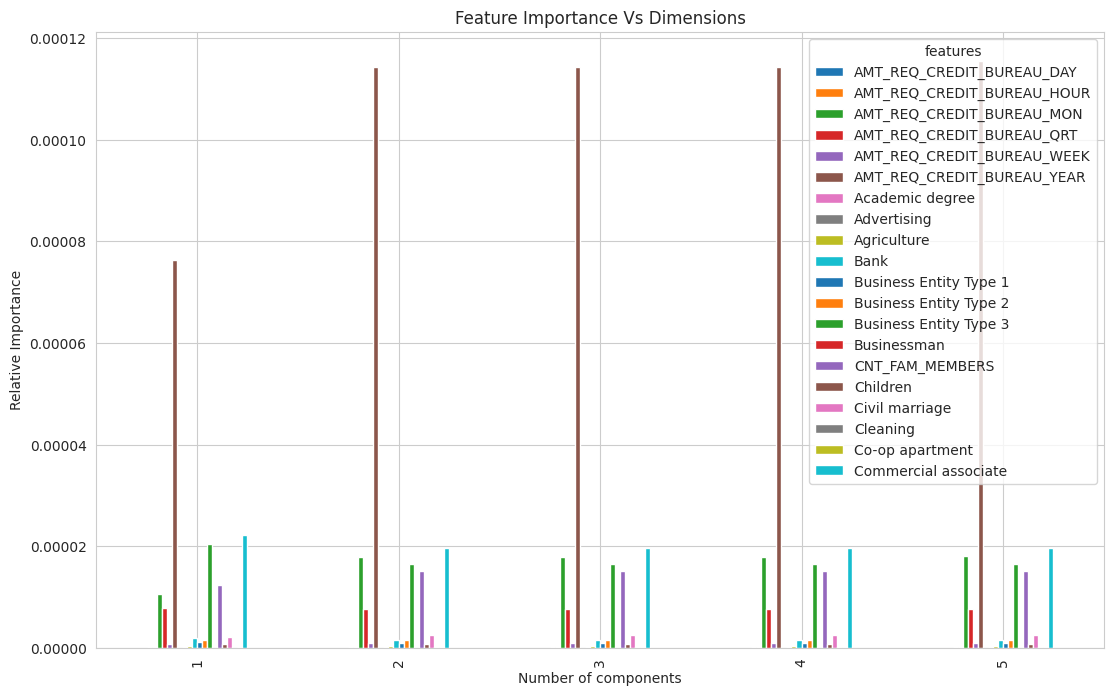

In [ ]:
top_features = feature_importance_report.columns[:20]  # Adjust the number based on your preference
ax = feature_importance_report[top_features].plot(kind='bar', figsize=(13, 8))
ax.set(xlabel = 'Number of components' ,  ylabel = 'Relative Importance' , title = 'Feature Importance Vs Dimensions')

In [ ]:
# let's do feature selection using a chi-squared (chi²) statistical test for non-negative features to select k (k=10) of the best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_sample = loan_data.drop(columns = 'TARGET')
y_sample = loan_data['TARGET']

#lets eliminate negative values
X_sample[X_sample<0] = 0

#applying SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X_sample,y_sample)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_sample.columns)

#concatenating two dataframes for better visualization

# feature scores
F_Scores = pd.concat([df_columns,df_scores],axis=1)
F_Scores.columns = ['Specs','Score']

# Score value is directly proportional to the feature importance
F_Scores

Specs         Score
0                     FLAG_OWN_CAR  9.550527e+01
1                  FLAG_OWN_REALTY  4.222285e+00
2                     CNT_CHILDREN  1.409317e+02
3                 AMT_INCOME_TOTAL  1.342819e+06
4                       AMT_CREDIT  7.558970e+07
5                      AMT_ANNUITY  3.752007e+05
6                  AMT_GOODS_PRICE  1.204756e+08
7       REGION_POPULATION_RELATIVE  3.812960e+00
8                       DAYS_BIRTH           NaN
9                    DAYS_EMPLOYED  1.948802e+08
10               DAYS_REGISTRATION           NaN
11                 DAYS_ID_PUBLISH           NaN
12                      FLAG_MOBIL  0.000000e+00
13                  FLAG_EMP_PHONE  1.172197e+02
14                 FLAG_WORK_PHONE  1.960941e+02
15                FLAG_CONT_MOBILE  3.162975e-05
16                      FLAG_PHONE  1.248672e+02
17                      FLAG_EMAIL  7.981923e-01
18                 CNT_FAM_MEMBERS  9.893709e+00
19            REGION_RATING_CLIENT  1.332613e+02
20     REGION_RATING_CLIENT_W_CITY  1.403919e+02
21         HOUR_APPR_PROCESS_START  1.536380e+02
22      REG_REGION_NOT_LIVE_REGION  9.519074e+00
23      REG_REGION_NOT_WORK_REGION  1.448820e+01
24     LIVE_REGION_NOT_WORK_REGION  2.565341e+00
25          REG_CITY_NOT_LIVE_CITY  5.614765e+02
26          REG_CITY_NOT_WORK_CITY  6.128890e+02
27         LIVE_CITY_NOT_WORK_CITY  2.645385e+02
28                    EXT_SOURCE_2  5.594822e+02
29        OBS_30_CNT_SOCIAL_CIRCLE  1.019909e+02
30        DEF_30_CNT_SOCIAL_CIRCLE  4.357425e+02
31        OBS_60_CNT_SOCIAL_CIRCLE  9.931669e+01
32        DEF_60_CNT_SOCIAL_CIRCLE  3.875359e+02
33          DAYS_LAST_PHONE_CHANGE           NaN
34                 FLAG_DOCUMENT_2  8.974633e+00
35                 FLAG_DOCUMENT_3  1.688576e+02
36                 FLAG_DOCUMENT_4  2.203481e+00
37                 FLAG_DOCUMENT_5  9.705162e-03
38                 FLAG_DOCUMENT_6  2.304886e+02
39                 FLAG_DOCUMENT_7  6.287029e-01
40                 FLAG_DOCUMENT_8  1.981852e+01
41                 FLAG_DOCUMENT_9  6.065219e+00
42                FLAG_DOCUMENT_10  5.288354e-01
43                FLAG_DOCUMENT_11  4.520700e+00
44                FLAG_DOCUMENT_12  1.762785e-01
45                FLAG_DOCUMENT_13  4.109134e+01
46                FLAG_DOCUMENT_14  2.970027e+01
47                FLAG_DOCUMENT_15  1.118055e+01
48                FLAG_DOCUMENT_16  4.217395e+01
49                FLAG_DOCUMENT_17  3.370273e+00
50                FLAG_DOCUMENT_18  1.868675e+01
51                FLAG_DOCUMENT_19  7.738331e-01
52                FLAG_DOCUMENT_20  5.261160e-02
53                FLAG_DOCUMENT_21  4.676320e+00
54      AMT_REQ_CREDIT_BUREAU_HOUR  1.231897e-02
55       AMT_REQ_CREDIT_BUREAU_DAY  1.879682e+00
56      AMT_REQ_CREDIT_BUREAU_WEEK  7.030429e-01
57       AMT_REQ_CREDIT_BUREAU_MON  2.134719e+02
58       AMT_REQ_CREDIT_BUREAU_QRT  2.558851e+01
59      AMT_REQ_CREDIT_BUREAU_YEAR  1.769626e+01
60                     Advertising  3.459971e-03
61                     Agriculture  1.771922e+01
62                            Bank  2.670189e+01
63          Business Entity Type 1  4.721850e-02
64          Business Entity Type 2  2.255425e+00
65          Business Entity Type 3  1.412886e+02
66                        Cleaning  2.916600e+00
67                    Construction  1.177771e+02
68                         Culture  3.056974e+00
69                     Electricity  2.467518e+00
70                       Emergency  1.096382e+00
71                      Government  1.633259e+01
72                           Hotel  3.443625e+00
73                         Housing  6.384812e-02
74                Industry: type 1  1.268437e+01
75               Industry: type 10  4.122861e-01
76               Industry: type 11  1.364638e+00
77               Industry: type 12  9.122313e+00
78               Industry: type 13  2.883155e+00
79                Industry: type 2  4.743332e-01
80                Industry: type 3  2.873334e+01
81         

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


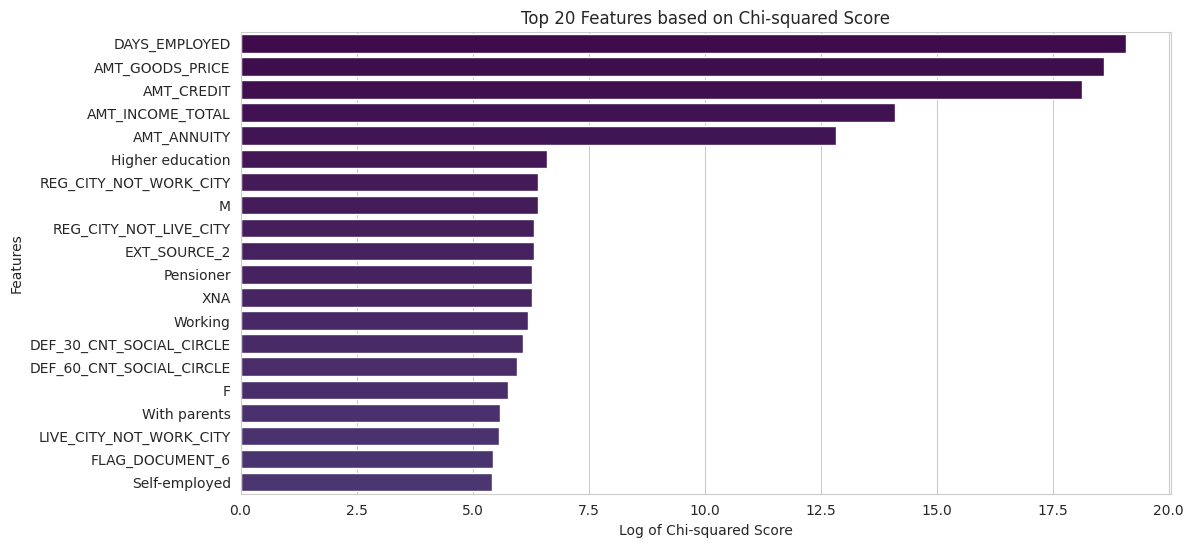

In [ ]:
import numpy as np
custom_palette = sns.color_palette("viridis",as_cmap=True)
sns.set_style('whitegrid')
colors = custom_palette(np.linspace(0, 1, len(F_Scores)))

f_scores = F_Scores.copy()
f_scores['Log_Score'] = np.log(F_Scores['Score'])  # Computing the log of the F-scores for easy visualisation

# Sorting the features by log scores in descending order
f_scores = f_scores.sort_values(by='Log_Score', ascending=False)

# Creating a bar plot to visualize feature scores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Log_Score', y='Specs', data=f_scores.head(20), palette = colors)  # Select the top 10 features
plt.title('Top 20 Features based on Chi-squared Score')
plt.xlabel('Log of Chi-squared Score')
plt.ylabel('Features')
plt.show()

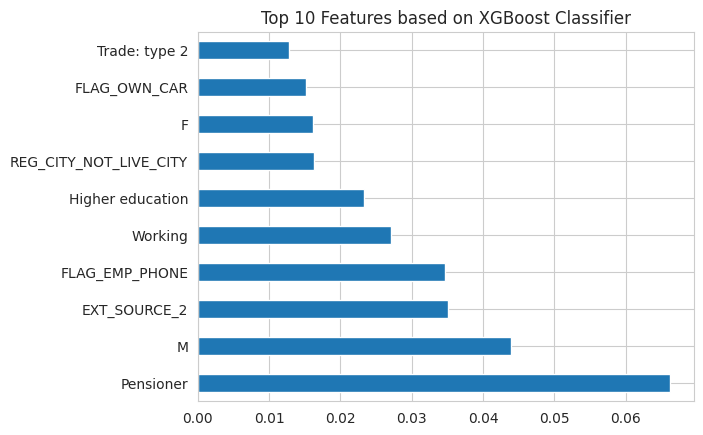

<Figure size 800x600 with 0 Axes>

In [ ]:
#lets see each feature importance using XGB Classifier

import xgboost
import matplotlib.pyplot as plt

X_sample = X_sample.drop(columns=['XNA'])
model_test = xgboost.XGBClassifier()
model_test.fit(X_sample,y_sample)

feat_imp = pd.Series(model_test.feature_importances_, index=X_sample.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features based on XGBoost Classifier')
plt.figure(figsize=(8,6))
plt.show()

In [ ]:
#Spliting the data into training and validation set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.2, random_state = 42)

In [ ]:
standarised_column = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY' , 'AMT_GOODS_PRICE' , 'REGION_POPULATION_RELATIVE' , 'DAYS_REGISTRATION' , 'DAYS_BIRTH' , 'DAYS_EMPLOYED' , 'DAYS_ID_PUBLISH']
for i in standarised_column:
  X_train[i] = abs(X_train[i])
  X_test[i] = abs(X_test[i])

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:, standarised_column] = sc.fit_transform(X_train.loc[:, standarised_column])
X_test.loc[:, standarised_column] = sc.transform(X_test.loc[:, standarised_column])

<ipython-input-257-76baa4da4c65>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, standarised_column] = sc.fit_transform(X_train.loc[:, standarised_column])
<ipython-input-257-76baa4da4c65>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, standarised_column] = sc.transform(X_test.loc[:, standarised_column])


In [ ]:
# xgboost classisfier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model_1 = XGBClassifier()
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#testing & metrics of the model

y_pred = model_1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9177927003464298

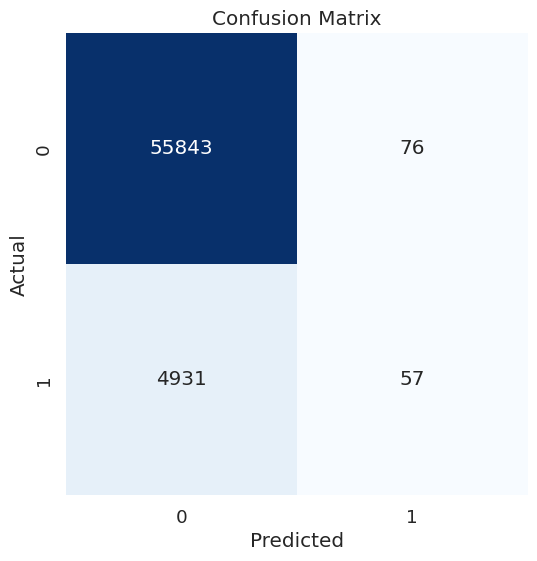

In [ ]:
#evaluating the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#plot this matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#defining evaluation criteria for each model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_results(y_true, y_pred):
    results = {}

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    results['Accuracy'] = accuracy

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred,average = 'weighted')
    recall = recall_score(y_true, y_pred, average = 'weighted')
    f1 = f1_score(y_true, y_pred,average = 'weighted')
    results['Precision'] = precision
    results['Recall'] = recall
    results['F1 Score'] = f1

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    results['Confusion Matrix'] = cm

    return results

results = calculate_results(y_test, y_pred)

print("Accuracy:", results['Accuracy'])
print("Precision:", results['Precision'])
print("Recall:", results['Recall'])
print("F1 Score:", results['F1 Score'])

Xgboost = {'accuracy': results['Accuracy'], 'precision': results['Precision'], 'recall': results['Recall'],'F1 Score' : results['F1 Score']}

Accuracy: 0.9177927003464298
Precision: 0.8787107035308898
Recall: 0.9177927003464298
F1 Score: 0.8805342096067196


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9181046513537032
Precision: 0.8839016436355351
Recall: 0.9181046513537032
F1 Score: 0.8790016570860701


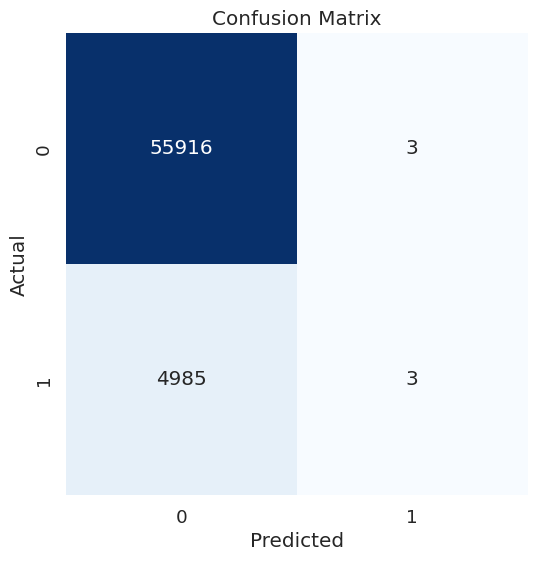

In [ ]:
# logistic regression classifier

from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

#testing of model
y_pred = model_2.predict(X_test)

#evaluating metrics of model
results = calculate_results(y_test, y_pred)

print("Accuracy:", results['Accuracy'])
print("Precision:", results['Precision'])
print("Recall:", results['Recall'])
print("F1 Score:", results['F1 Score'])

cm = results['Confusion Matrix']

#plotting confusion matrix

plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic_Regression = {'accuracy': results['Accuracy'], 'precision': results['Precision'], 'recall': results['Recall'],'F1 Score' : results['F1 Score']}

In [ ]:
#lets build DNN Architecture

import tensorflow as tf
from tensorflow.keras import layers

model_3 = tf.keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(3, activation = 'softmax')

])

model_3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model_3.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 10)

Epoch 1/10
7614/7614 [==============================] - 121s 16ms/step - loss: 0.2765 - accuracy: 0.9170 - val_loss: 0.2706 - val_accuracy: 0.9181
Epoch 2/10
7614/7614 [==============================] - 46s 6ms/step - loss: 0.2661 - accuracy: 0.9192 - val_loss: 0.2650 - val_accuracy: 0.9181
Epoch 3/10
7614/7614 [==============================] - 51s 7ms/step - loss: 0.2645 - accuracy: 0.9192 - val_loss: 0.2642 - val_accuracy: 0.9181
Epoch 4/10
7614/7614 [==============================] - 46s 6ms/step - loss: 0.2635 - accuracy: 0.9192 - val_loss: 0.2630 - val_accuracy: 0.9181
Epoch 5/10
7614/7614 [==============================] - 50s 7ms/step - loss: 0.2626 - accuracy: 0.9192 - val_loss: 0.2657 - val_accuracy: 0.9181
Epoch 6/10
7614/7614 [==============================] - 51s 7ms/step - loss: 0.2619 - accuracy: 0.9192 - val_loss: 0.2636 - val_accuracy: 0.9181
Epoch 7/10
7614/7614 [==============================] - 47s 6ms/step - loss: 0.2612 - accuracy: 0.9192 - val_loss: 0.2627 - val_

<ipython-input-265-6c843ccc777a>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # White grid style


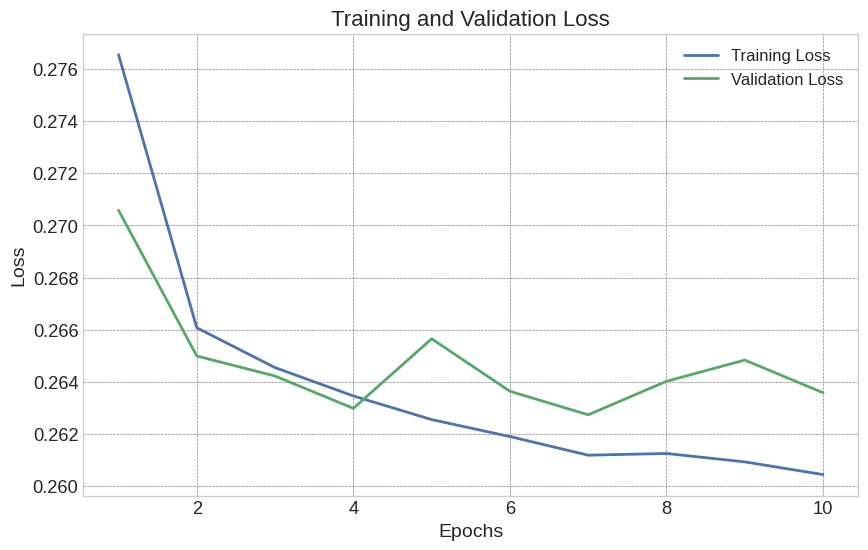

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    # Extract loss values from the history object
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get the number of epochs
    epochs = range(1, len(train_loss) + 1)

    # Plot the training and validation loss with styling
    plt.figure(figsize=(10, 6))

    # Styling options
    plt.style.use('seaborn-whitegrid')  # White grid style
    plt.plot(epochs, train_loss, 'b', label='Training Loss', linewidth=2)
    plt.plot(epochs, val_loss, 'g', label='Validation Loss', linewidth=2)

    # Add labels and title
    plt.title('Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)

    # Add legend and grid
    plt.legend(fontsize=12)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

    plt.show()

plot_loss_curves(history)

<ipython-input-266-011a6dda75b9>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # White grid style


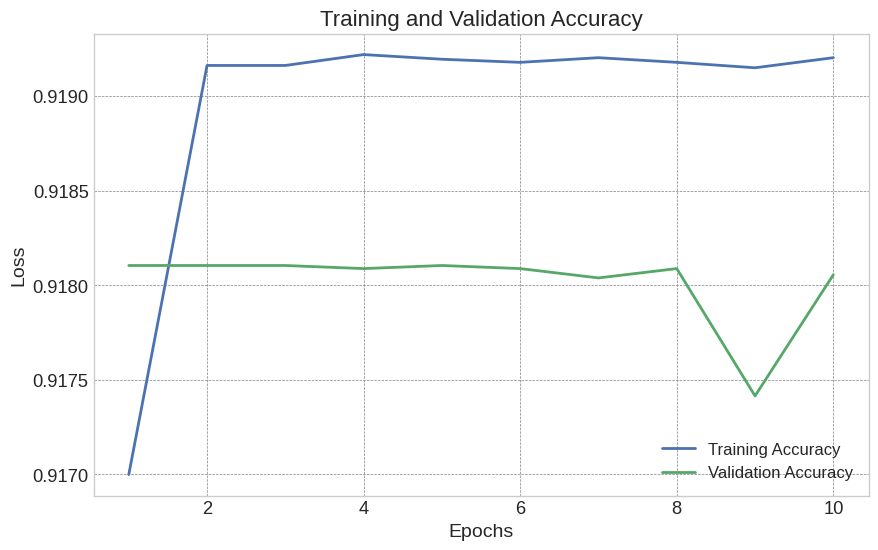

In [ ]:
def plot_accuracy_curve(history):
    # Extract loss values from the history object
    train_loss = history.history['accuracy']
    val_loss = history.history['val_accuracy']

    # Get the number of epochs
    epochs = range(1, len(train_loss) + 1)

    # Plot the training and validation loss with styling
    plt.figure(figsize=(10, 6))

    # Styling options
    plt.style.use('seaborn-whitegrid')  # White grid style
    plt.plot(epochs, train_loss, 'b', label='Training Accuracy', linewidth=2)
    plt.plot(epochs, val_loss, 'g', label='Validation Accuracy', linewidth=2)

    # Add labels and title
    plt.title('Training and Validation Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)

    # Add legend and grid
    plt.legend(fontsize=12)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

    plt.show()

plot_accuracy_curve(history)

In [ ]:
#reinterating predictions for evaluation criteria
y_prob = model_3.predict(X_test)
y_pred = tf.argmax(y_prob, axis = 1)

1904/1904 [==============================] - 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9180553959315021
Precision: 0.8757348578506404
Recall: 0.9180553959315021
F1 Score: 0.8790166169740976


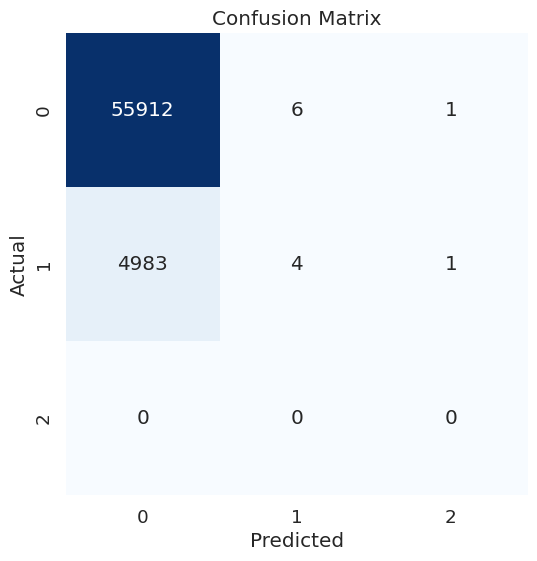

In [ ]:
#evaluating metrics of model
results = calculate_results(y_test, y_pred)

print("Accuracy:", results['Accuracy'])
print("Precision:", results['Precision'])
print("Recall:", results['Recall'])
print("F1 Score:", results['F1 Score'])

cm = results['Confusion Matrix']

#plotting confusion matrix

plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

DNN = {'accuracy': results['Accuracy'], 'precision': results['Precision'], 'recall': results['Recall'],'F1 Score' : results['F1 Score']}

In [ ]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators=1500,criterion='entropy',random_state = 42)
model_4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1500, random_state=42)

Accuracy: 0.9180718144055692
Precision: 0.8429136817953374
Recall: 0.9180718144055692
F1 Score: 0.8788888890937654


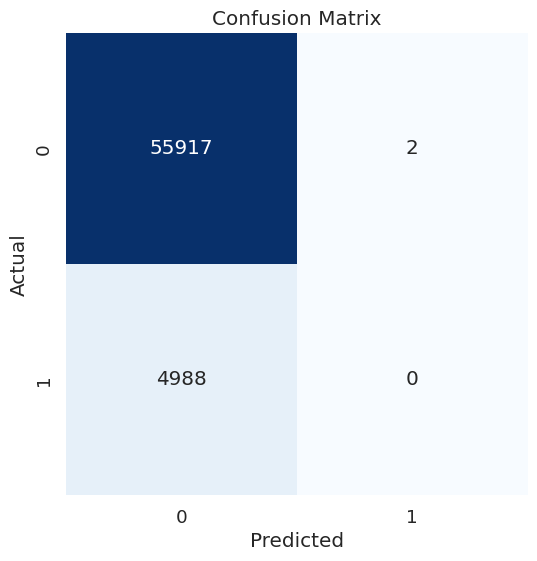

In [ ]:
#testing of model
y_pred = model_4.predict(X_test)

#evaluating metrics of model
results = calculate_results(y_test, y_pred)

print("Accuracy:", results['Accuracy'])
print("Precision:", results['Precision'])
print("Recall:", results['Recall'])
print("F1 Score:", results['F1 Score'])

cm = results['Confusion Matrix']

#plotting confusion matrix

plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random_Forest = {'accuracy': results['Accuracy'], 'precision': results['Precision'], 'recall': results['Recall'],'F1 Score' : results['F1 Score']}

In [ ]:
#Creating a dataframe to summarise which model have performed better

model_perf = pd.DataFrame({"XGBoost":Xgboost,"Logistic Regression":Logistic_Regression,"Deep Neural Network":DNN, "Random Forest":Random_Forest})
model_perf = model_perf.transpose()
model_perf.sort_values(by=['accuracy'],ascending=False)

accuracy  precision    recall  F1 Score
Logistic Regression  0.918105   0.883902  0.918105  0.879002
Random Forest        0.918072   0.842914  0.918072  0.878889
Deep Neural Network  0.918055   0.875735  0.918055  0.879017
XGBoost              0.917793   0.878711  0.917793  0.880534